# SML 312 Final Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import random

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

/var/folders/tr/vc0w8l313hb34wgqsy5371wc0000gn/T/ipykernel_11160/115283551.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Census Tract Data and Models

### Loading and Cleaning the Census Tract Data

In [3]:
acs_tract = pd.read_csv("/Users/conniegong/Downloads/SML/SML 312/Final Project/Data/2010_CA_ACS.csv")
acs_tract.head()

,FIPS,Geographic Identifier,Area_Name,Summary Level,Geographic Component,Logical Record Number,County,Census Tract,Total Population,Total Population.1,...,Average Household Income (In 2010&nbsp; Inflation&nbsp;&nbsp;&nbsp;&nbsp; Adjusted Dollars): Two or More Races Householder,Average Household Income (In 2010&nbsp; Inflation&nbsp;&nbsp;&nbsp;&nbsp; Adjusted Dollars): Hispanic or Latino Householder,"Average Household Income (In 2010&nbsp; Inflation&nbsp;&nbsp;&nbsp;&nbsp; Adjusted Dollars): White Alone Householder, Not Hispanic or Latino",Per Capita Income (In 2010 Inflation Adjusted Dollars),White Alone Population for Whom Poverty Status Is Determined:,White Alone Population for Whom Poverty Status Is Determined: Income in 2010 Below Poverty Level,White Alone Population for Whom Poverty Status Is Determined: Income in 2010 At or Above Poverty Level,Black or African American Alone Population for Whom Poverty Status Is Determined:,Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 Below Poverty Level,Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 At or Above Poverty Level
0,6001400100,14000US06001400100,"Census Tract 4001, Alameda County, California",140,0,15588,1,400100,2701,2701,...,NaN,235697.43590,243707.75330,117910.0,2172,103,2069,87,0,87
1,6001400200,14000US06001400200,"Census Tract 4002, Alameda County, California",140,0,15589,1,400200,2050,2050,...,424216.66670,481414.81480,168527.80200,81758.0,1559,42,1517,72,0,72
2,6001400300,14000US06001400300,"Census Tract 4003, Alameda County, California",140,0,15590,1,400300,4719,4719,...,0.00000,76425.64103,103656.92900,50013.0,3628,328,3300,520,118,402
3,6001400400,14000US06001400400,"Census Tract 4004, Alameda County, California",140,0,15591,1,400400,3930,3930,...,81949.10714,75301.25000,117290.64280,49209.0,2953,200,2753,368,26,342
4,6001400500,14000US06001400500,"Census Tract 4005, Alameda County, California",140,0,15592,1,400500,3506,3506,...,59239.21569,87720.31250,90254.48635,34284.0,1809,144,1665,1106,235,871


In [4]:
# addressing multicollinearity by dropping categories of collinear variables from the 2010 data
ca_new_clean = acs_tract[["FIPS", "County", "Area_Name", "Census Tract", "Total Population", "Population Density (Per Sq. Mile)",
                      "Area (Land)", "Male Population 25 Years and Over:", "Male Population 25 Years and Over: High School Graduate (Includes Equivalency)",
                      "Total Population: White Alone", "Total Population: Black or African American Alone", "Total Population: Asian Alone", "Total Population: Not Hispanic or Latino", "Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)",
                      "Population 16 Years and Over: in Labor Force: Civilian: Unemployed", "Median Household Income (In 2010 Inflation Adjusted Dollars)",
                      'Per Capita Income (In 2010 Inflation Adjusted Dollars)',
                      'White Alone Population for Whom Poverty Status Is  Determined: Income in 2010 Below Poverty Level', 'Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 Below Poverty Level',]]

In [4]:
ca_new_clean.head()

,FIPS,County,Area_Name,Census Tract,Total Population,Population Density (Per Sq. Mile),Area (Land),Male Population 25 Years and Over:,Male Population 25 Years and Over: High School Graduate (Includes Equivalency),Total Population: White Alone,Total Population: Black or African American Alone,Total Population: Asian Alone,Total Population: Not Hispanic or Latino,"Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)",Population 16 Years and Over: in Labor Force: Civilian: Unemployed,Median Household Income (In 2010 Inflation Adjusted Dollars),Per Capita Income (In 2010 Inflation Adjusted Dollars),White Alone Population for Whom Poverty Status Is Determined: Income in 2010 Below Poverty Level,Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 Below Poverty Level
0,6001400100,1,"Census Tract 4001, Alameda County, California",400100,2701,1016.464,2.657250,1175,30,2172,87,268,2608,0,52,173472.0,117910.0,103,0
1,6001400200,1,"Census Tract 4002, Alameda County, California",400200,2050,8921.898,0.229772,729,69,1559,72,213,1860,0,19,95833.0,81758.0,42,0
2,6001400300,1,"Census Tract 4003, Alameda County, California",400300,4719,11057.490,0.426770,1651,147,3628,520,285,4202,0,149,52314.0,50013.0,328,118
3,6001400400,1,"Census Tract 4004, Alameda County, California",400400,3930,14464.720,0.271695,1518,89,2963,368,251,3601,0,108,79071.0,49209.0,200,26
4,6001400500,1,"Census Tract 4005, Alameda County, California",400500,3506,15440.110,0.227071,1186,183,1809,1106,172,3091,0,184,52076.0,34284.0,144,235


In [5]:
county_animals = pd.read_csv("/Users/conniegong/Downloads/SML/SML 312/Final Project/Data/county_animals.csv")
county_crops = pd.read_csv("/Users/conniegong/Downloads/SML/SML 312/Final Project/Data/County_Crops.csv")

In [6]:
county_animals_clean = county_animals.loc[:, ["County", "Value"]]
county_animals_clean["Area Name"] = county_animals_clean["County"].str.upper() + " COUNTY"
county_animals_clean = county_animals_clean.loc[:, ["Value", "Area Name"]]
county_animals_clean = county_animals_clean.rename(columns={'Value': 'Value of Animal Products'})

In [7]:
county_crops_clean = county_crops.loc[:, ["County", "Value"]]
county_crops_clean = county_crops_clean[1::2]
county_crops_clean["Area Name"] = county_crops_clean["County"].str.upper() + " COUNTY"
county_crops_clean = county_crops_clean.loc[:, ["Value", "Area Name"]]
county_crops_clean = county_crops_clean.rename(columns={'Value': 'Value of Crops'})

In [8]:
county_numbers = pd.read_csv("/Users/conniegong/Downloads/SML/SML 312/Final Project/Data/County Numbers.csv")
county_numbers['County Number'] = county_numbers['County Number'].astype(int)

In [9]:
county_crops_clean = county_crops_clean.merge(county_numbers, on='Area Name', how="left")

In [10]:
county_animals_clean = county_animals_clean.merge(county_numbers, on='Area Name', how='left')

In [11]:
county_animals_clean = county_animals_clean.iloc[:, [0, 2]]
county_crops_clean = county_crops_clean.iloc[:, [0, 2]]
county_crops_clean = county_crops_clean.rename(columns = {"County Number" : "County"})
county_animals_clean = county_animals_clean.rename(columns = {"County Number" : "County"})

In [12]:
for i in range(58):
    county_animals_clean['Value of Animal Products'][i] = county_animals_clean['Value of Animal Products'][i].replace(',', '') 
    county_crops_clean['Value of Crops'][i] = county_crops_clean['Value of Crops'][i].replace(',', '') 

/var/folders/tr/vc0w8l313hb34wgqsy5371wc0000gn/T/ipykernel_11160/1420752871.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  county_animals_clean['Value of Animal Products'][i] = county_animals_clean['Value of Animal Products'][i].replace

In [13]:
county_crops_clean["Value of Crops"] = county_crops_clean["Value of Crops"].replace(' (D)', np.nan)
county_animals_clean["Value of Animal Products"] = county_animals_clean["Value of Animal Products"].replace(' (D)', np.nan)

In [14]:
county_crops_clean["Value of Crops"] = county_crops_clean["Value of Crops"].astype(float)
county_animals_clean["Value of Animal Products"] = county_animals_clean["Value of Animal Products"].astype(float)

In [15]:
# random imputation for the missing crop and animal values 
def random_imputation(df, feature): #used code from kaggle for this

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [16]:
missing_column_1 = ["Value of Animal Products"] # used code from kaggle for this
missing_column_2 = ["Value of Crops"]

In [17]:
for feature in missing_column_1: # used code from kaggle for this
    county_animals_clean[feature + '_imp'] = county_animals_clean[feature]
    county_animals_clean = random_imputation(county_animals_clean, feature)

In [18]:
for feature in missing_column_2: # used code from kaggle for this
    county_crops_clean[feature + '_imp'] = county_crops_clean[feature]
    county_crops_clean = random_imputation(county_crops_clean, feature)

In [19]:
county_crops_clean = county_crops_clean.iloc[:, [1,2]]
county_animals_clean = county_animals_clean.iloc[:, [1,2]]

In [20]:
ca_new_clean = ca_new_clean.merge(county_crops_clean, on="County", how="left")

In [21]:
ca_new_clean = ca_new_clean.merge(county_animals_clean, on="County", how="left")
ca_new_clean.head()

,FIPS,County,Area_Name,Census Tract,Total Population,Population Density (Per Sq. Mile),Area (Land),Male Population 25 Years and Over:,Male Population 25 Years and Over: High School Graduate (Includes Equivalency),Total Population: White Alone,...,Total Population: Asian Alone,Total Population: Not Hispanic or Latino,"Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)",Population 16 Years and Over: in Labor Force: Civilian: Unemployed,Median Household Income (In 2010 Inflation Adjusted Dollars),Per Capita Income (In 2010 Inflation Adjusted Dollars),White Alone Population for Whom Poverty Status Is Determined: Income in 2010 Below Poverty Level,Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 Below Poverty Level,Value of Crops_imp,Value of Animal Products_imp
0,6001400100,1,"Census Tract 4001, Alameda County, California",400100,2701,1016.464,2.657250,1175,30,2172,...,268,2608,0,52,173472.0,117910.0,103,0,35752000.0,10413000.0
1,6001400200,1,"Census Tract 4002, Alameda County, California",400200,2050,8921.898,0.229772,729,69,1559,...,213,1860,0,19,95833.0,81758.0,42,0,35752000.0,10413000.0
2,6001400300,1,"Census Tract 4003, Alameda County, California",400300,4719,11057.490,0.426770,1651,147,3628,...,285,4202,0,149,52314.0,50013.0,328,118,35752000.0,10413000.0
3,6001400400,1,"Census Tract 4004, Alameda County, California",400400,3930,14464.720,0.271695,1518,89,2963,...,251,3601,0,108,79071.0,49209.0,200,26,35752000.0,10413000.0
4,6001400500,1,"Census Tract 4005, Alameda County, California",400500,3506,15440.110,0.227071,1186,183,1809,...,172,3091,0,184,52076.0,34284.0,144,235,35752000.0,10413000.0


Reference for random imputation: https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression

In [22]:
# inspecting rows where there are NA values
ca_new_clean.loc[ca_new_clean.isnull().any(axis=1)]

,FIPS,County,Area_Name,Census Tract,Total Population,Population Density (Per Sq. Mile),Area (Land),Male Population 25 Years and Over:,Male Population 25 Years and Over: High School Graduate (Includes Equivalency),Total Population: White Alone,...,Total Population: Asian Alone,Total Population: Not Hispanic or Latino,"Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)",Population 16 Years and Over: in Labor Force: Civilian: Unemployed,Median Household Income (In 2010 Inflation Adjusted Dollars),Per Capita Income (In 2010 Inflation Adjusted Dollars),White Alone Population for Whom Poverty Status Is Determined: Income in 2010 Below Poverty Level,Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 Below Poverty Level,Value of Crops_imp,Value of Animal Products_imp
360,6001990000,1,"Census Tract 9900, Alameda County, California",990000,0,NaN,0.000000,0,0,0,...,0,0,0,0,NaN,NaN,0,0,3.575200e+07,1.041300e+07
644,6013990000,13,"Census Tract 9900, Contra Costa County, Califo...",990000,0,NaN,0.000000,0,0,0,...,0,0,0,0,NaN,NaN,0,0,6.440600e+07,1.882300e+07
652,6015990000,15,"Census Tract 9900, Del Norte County, California",990000,0,NaN,0.000000,0,0,0,...,0,0,0,0,NaN,NaN,0,0,1.111100e+07,3.227900e+07
695,6017990000,17,"Census Tract 9900, El Dorado County, California",990000,0,NaN,0.000000,0,0,0,...,0,0,0,0,NaN,NaN,0,0,2.135200e+07,3.181000e+06
813,6019005408,19,"Census Tract 54.08, Fresno County, California",5408,1383,722.8077,1.913372,32,0,711,...,113,1018,0,110,NaN,4329.0,0,0,4.083741e+09,1.659028e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7607,6097990100,97,"Census Tract 9901, Sonoma County, California",990100,0,NaN,0.000000,0,0,0,...,0,0,0,0,NaN,NaN,0,0,6.148680e+08,3.041860e+08
7810,6107004000,107,"Census Tract 40, Tulare County, California",4000,385,783.4026,0.491446,219,44,294,...,6,304,24,0,NaN,334.0,201,53,2.223460e+09,2.251349e+09
7827,6109985202,109,"Census Tract 9852.02, Tuolumne County, California",985202,0,0.0000,0.280581,0,0,0,...,0,0,0,0,NaN,NaN,0,0,1.119000e+06,3.115000e+07
8000,6111980000,111,"Census Tract 9800, Ventura County, California",980000,0,0.0000,22.638772,0,0,0,...,0,0,0,0,NaN,NaN,0,0,1.620611e+09,1.268200e+07


In [23]:
# dropping rows where the data is missing
ca_new_clean = ca_new_clean.dropna()

### Exploratory Data Analysis 

Text(0, 0.5, 'Number of Census Tracts')

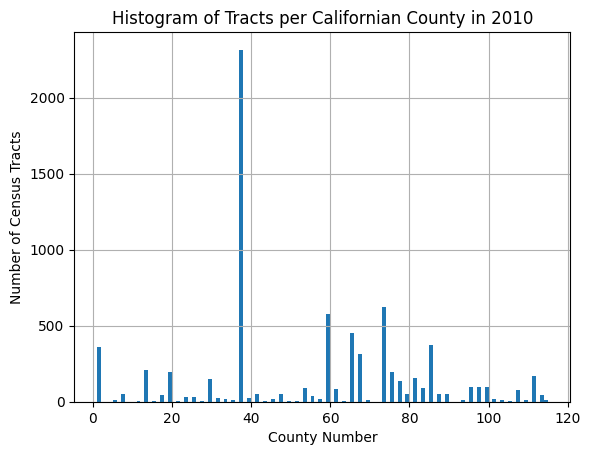

In [134]:
ca_new_clean["County"].hist(bins = range(1, 116, 1))
plt.title("Histogram of Tracts per Californian County in 2010")
plt.xlabel("County Number")
plt.ylabel("Number of Census Tracts")

https://stackoverflow.com/questions/6986986/bin-size-in-matplotlib-histogram



<Axes: >

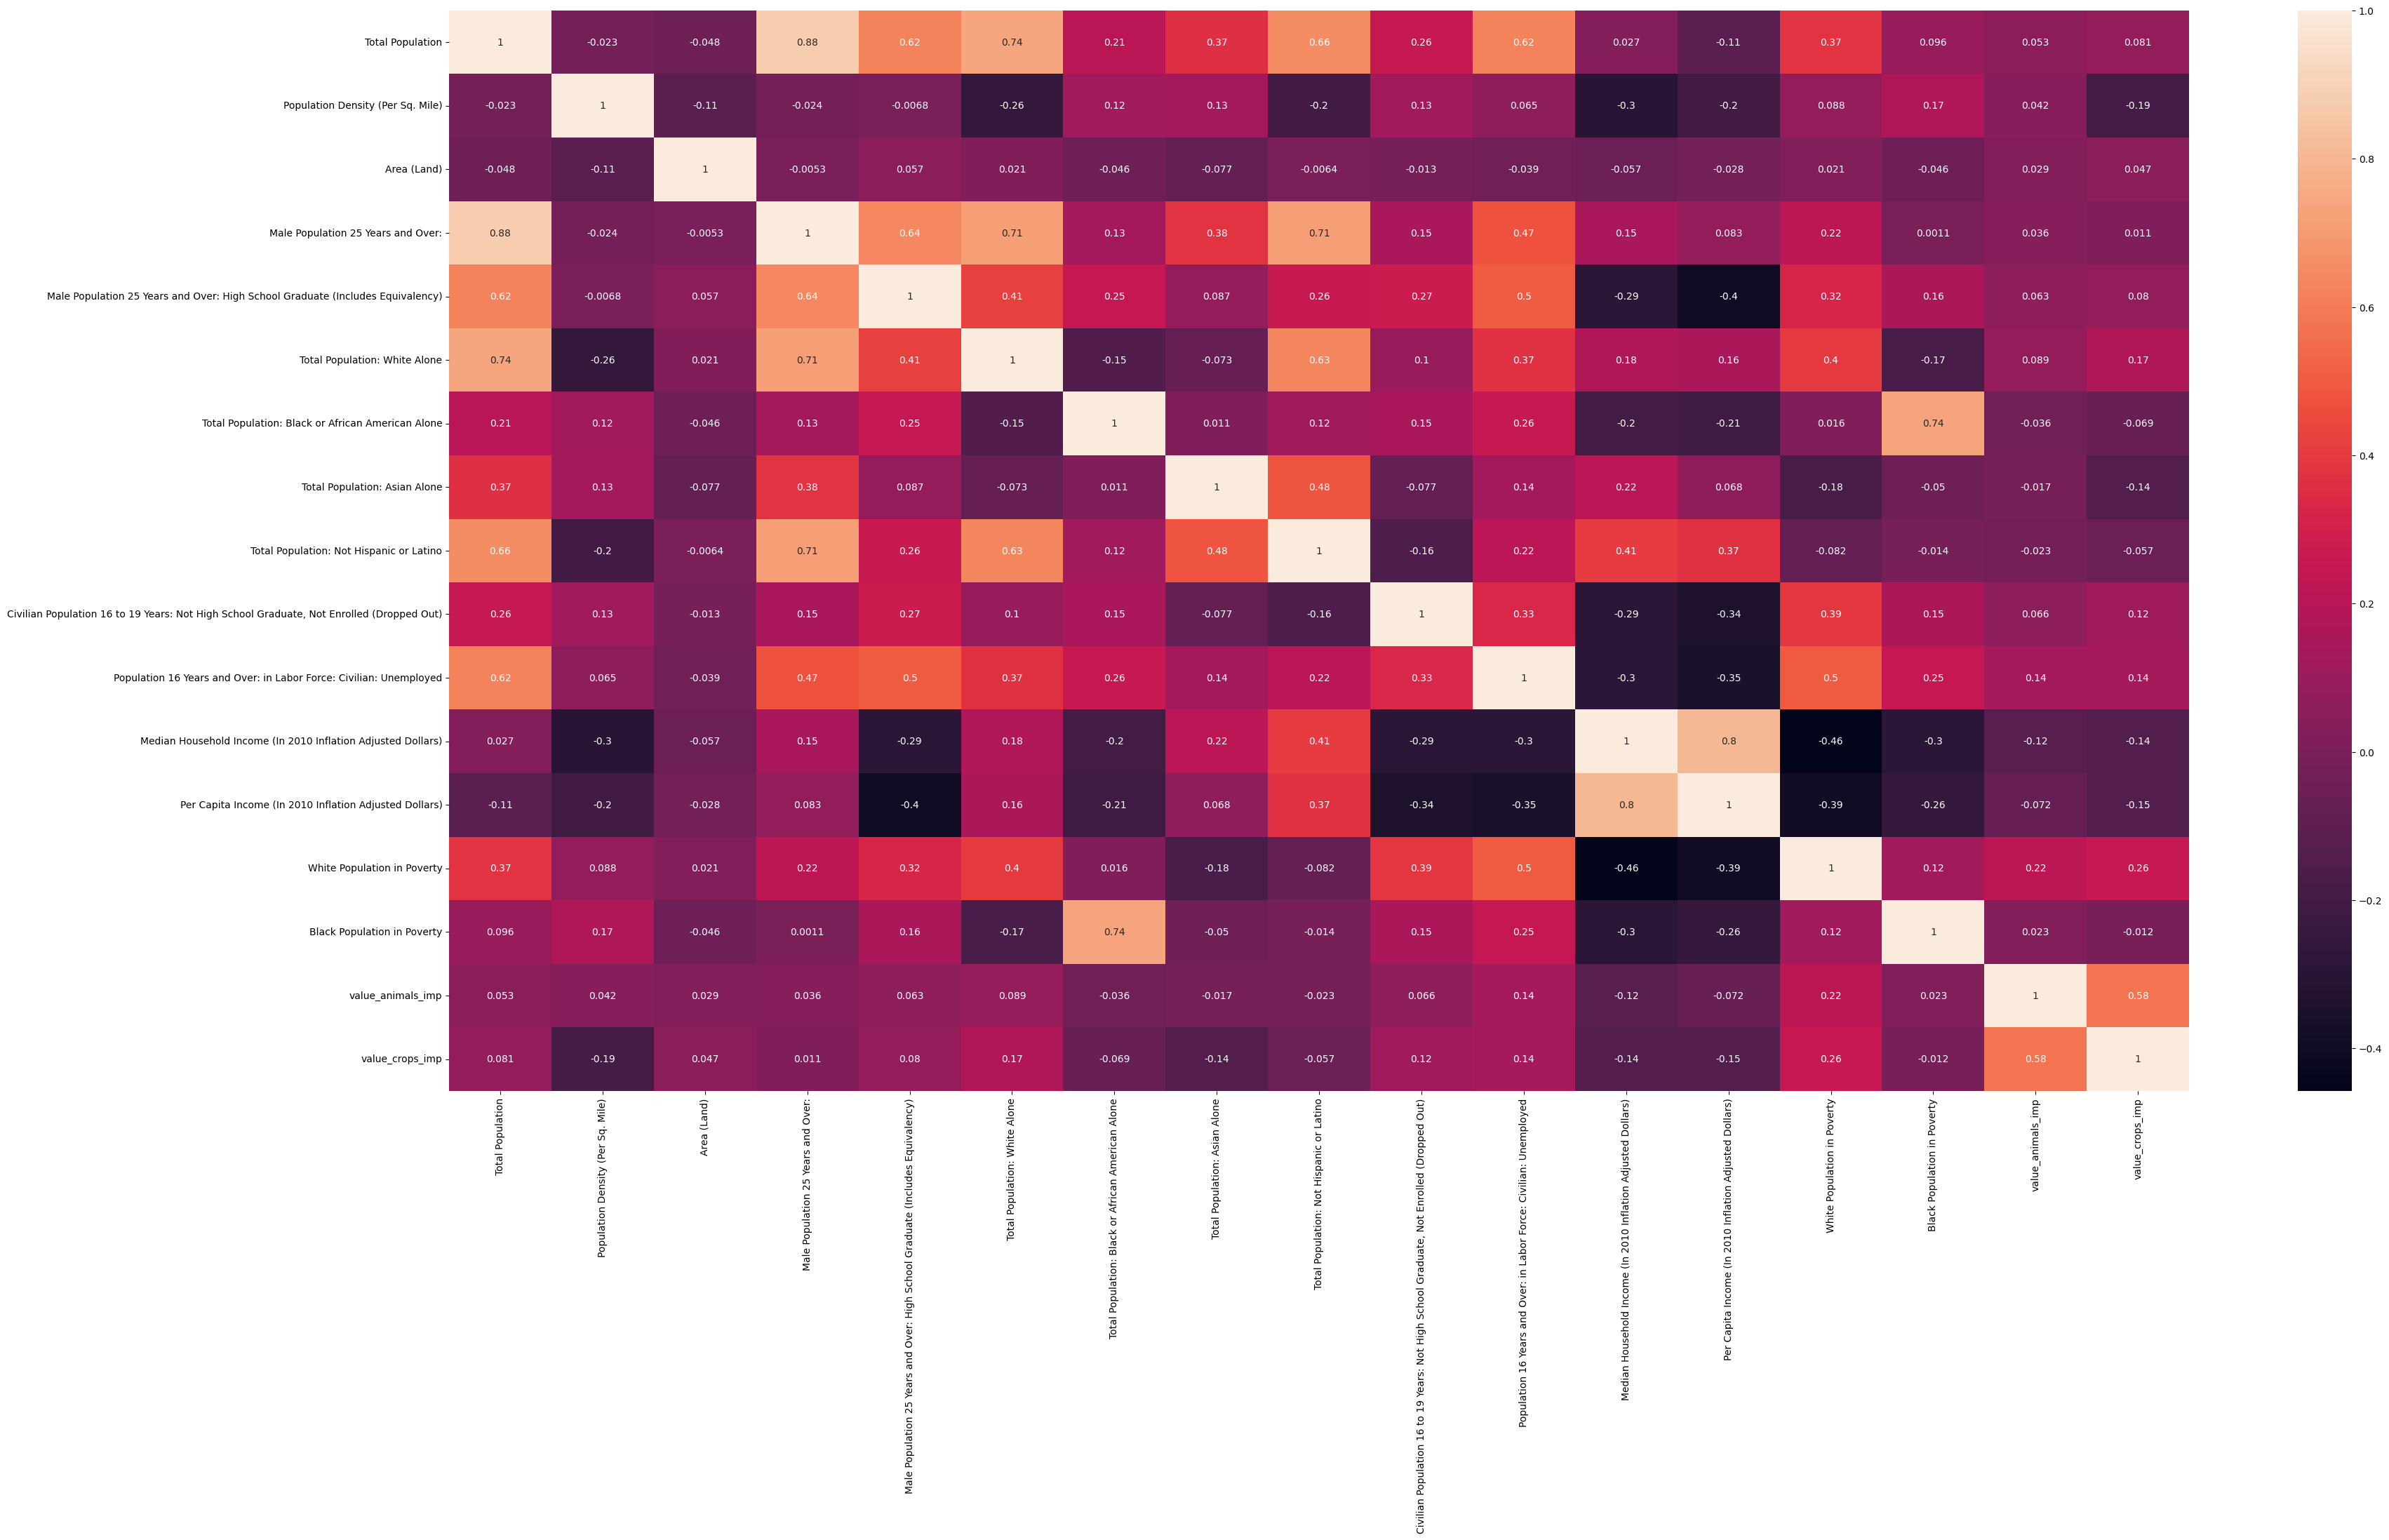

In [135]:
plt.figure(figsize = (40, 20))
sns.heatmap(ca_new_clean.iloc[:, 4:].corr(), annot = True)

In [43]:
ca_new_clean = ca_new_clean.rename(columns = {'Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)':"Civilian Population 16 to 19 Years: Dropped Out"})

In [45]:
ca_new_clean.columns

Index(['FIPS', 'County', 'Area_Name', 'Census Tract', 'Total Population',
       'Population Density (Per Sq. Mile)', 'Area (Land)',
       'Male Population 25 Years and Over:',
       'Male Population 25 Years and Over: High School Graduate (Includes Equivalency)',
       'Total Population: White Alone',
       'Total Population: Black or African American Alone',
       'Total Population: Asian Alone',
       'Total Population: Not Hispanic or Latino',
       'Civilian Population 16 to 19 Years: Dropped Out',
       'Population 16 Years and Over: in Labor Force: Civilian: Unemployed',
       'Median Household Income (In 2010 Inflation Adjusted Dollars)',
       'Per Capita Income (In 2010 Inflation Adjusted Dollars)',
       'White Alone Population for Whom Poverty Status Is  Determined: Income in 2010 Below Poverty Level',
       'Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 Below Poverty Level',
     

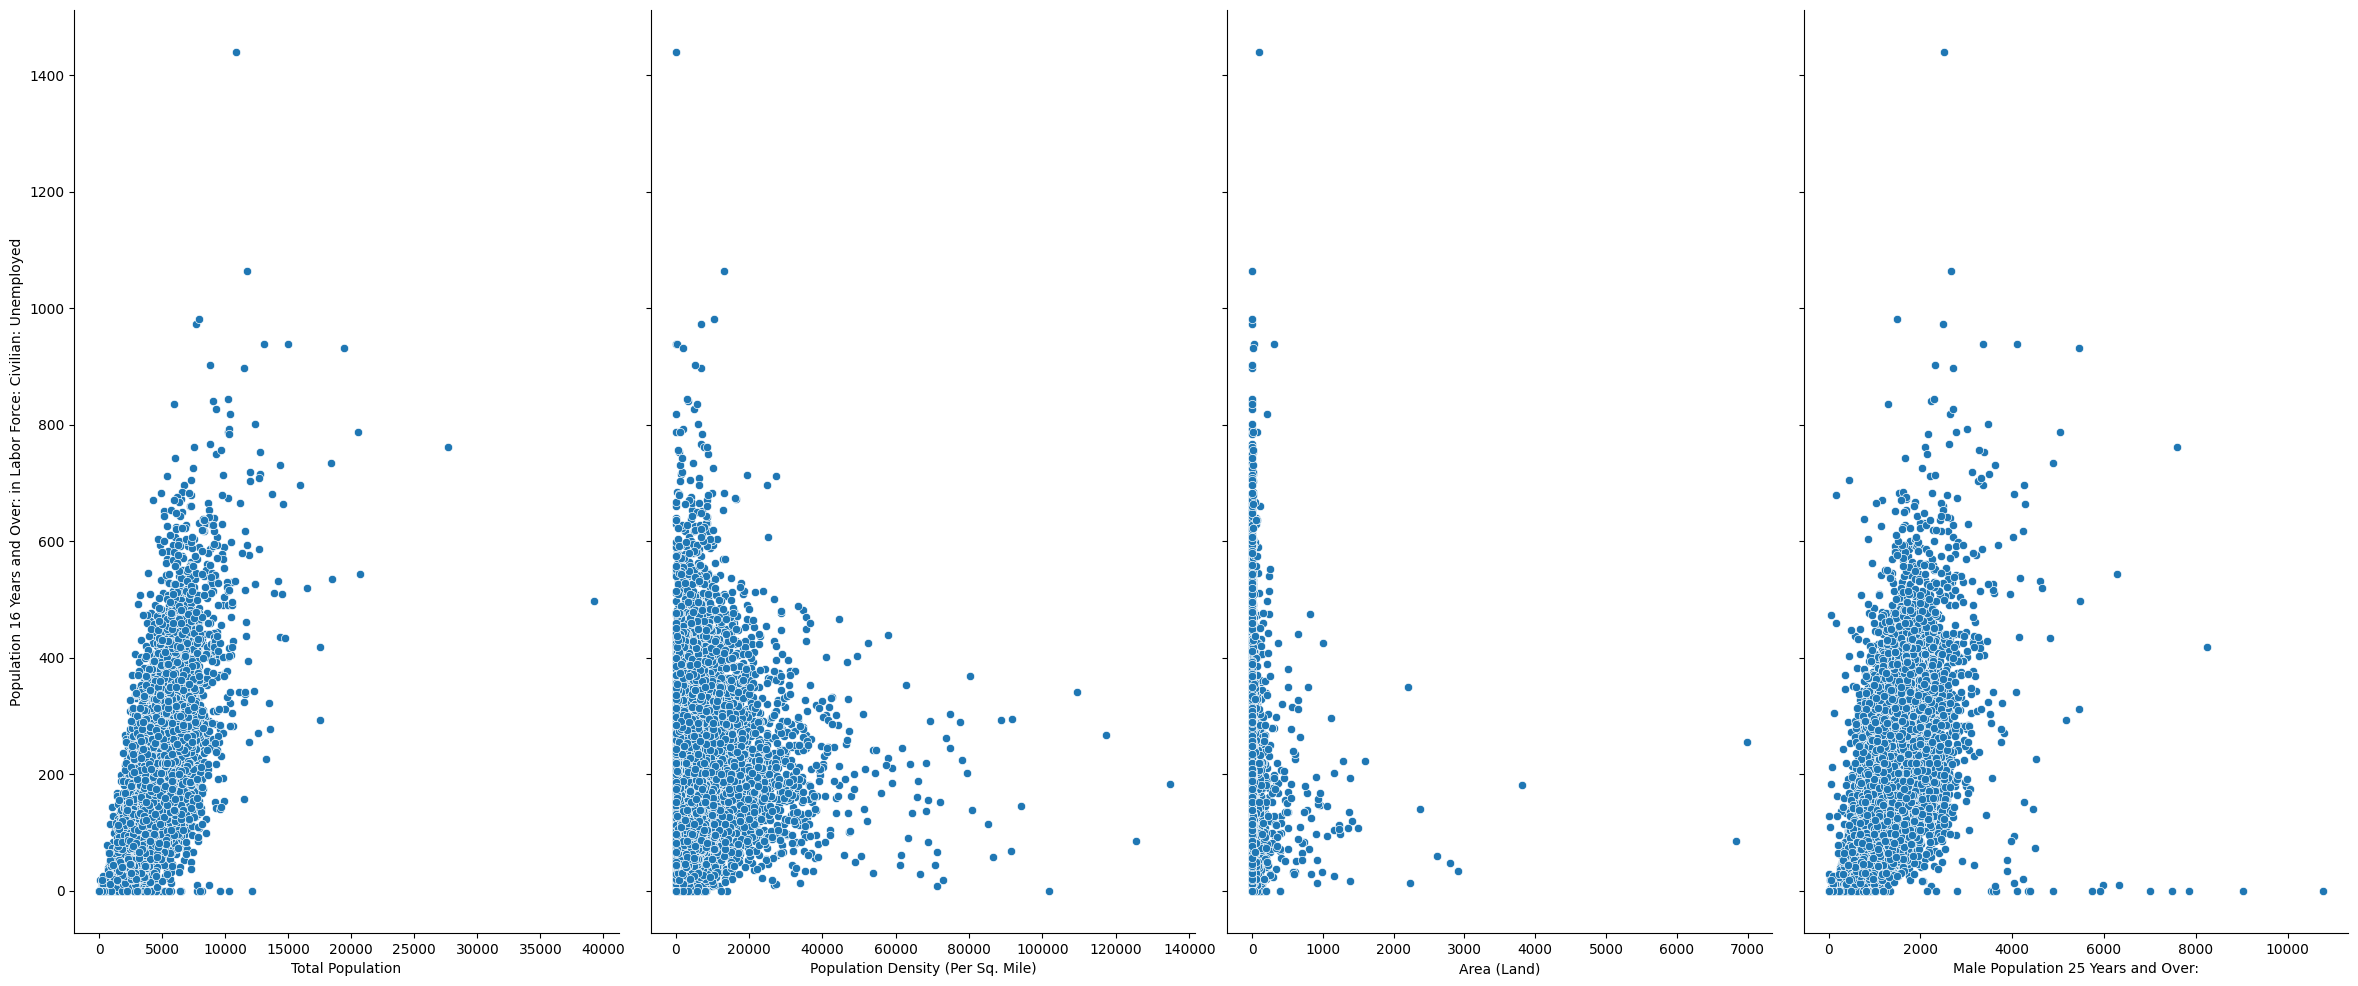

In [37]:
sns.pairplot(data = ca_new_clean, x_vars = ['Total Population', 'Population Density (Per Sq. Mile)', 
                                            'Area (Land)', 'Male Population 25 Years and Over:'],
            y_vars = ['Population 16 Years and Over: in Labor Force: Civilian: Unemployed'],
            height = 10, aspect = 0.6)

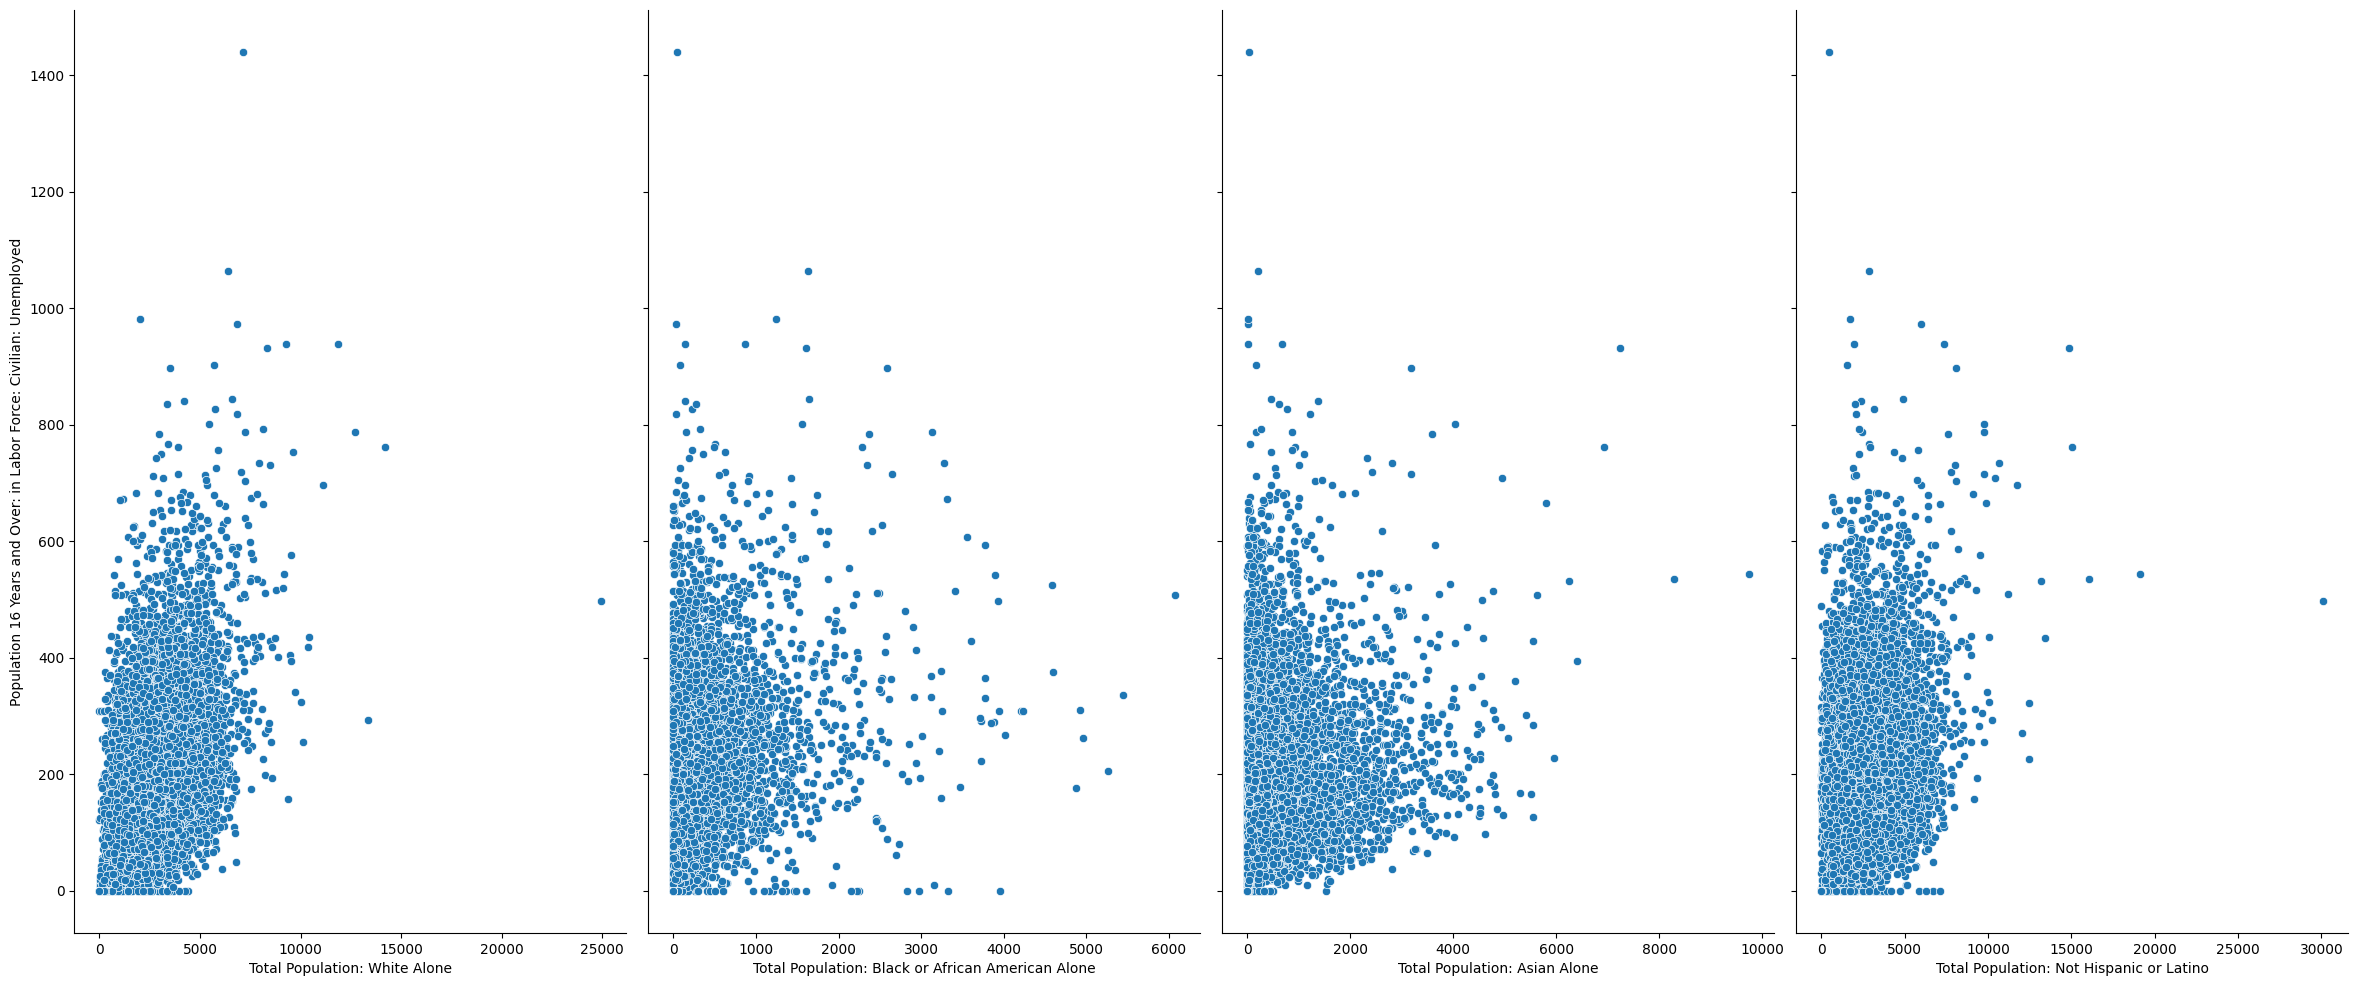

In [38]:
sns.pairplot(data = ca_new_clean, x_vars = ['Total Population: White Alone', 
                                            'Total Population: Black or African American Alone',
                                           'Total Population: Asian Alone', 
                                            'Total Population: Not Hispanic or Latino'],
            y_vars = ['Population 16 Years and Over: in Labor Force: Civilian: Unemployed'],
            height = 10, aspect = 0.6)

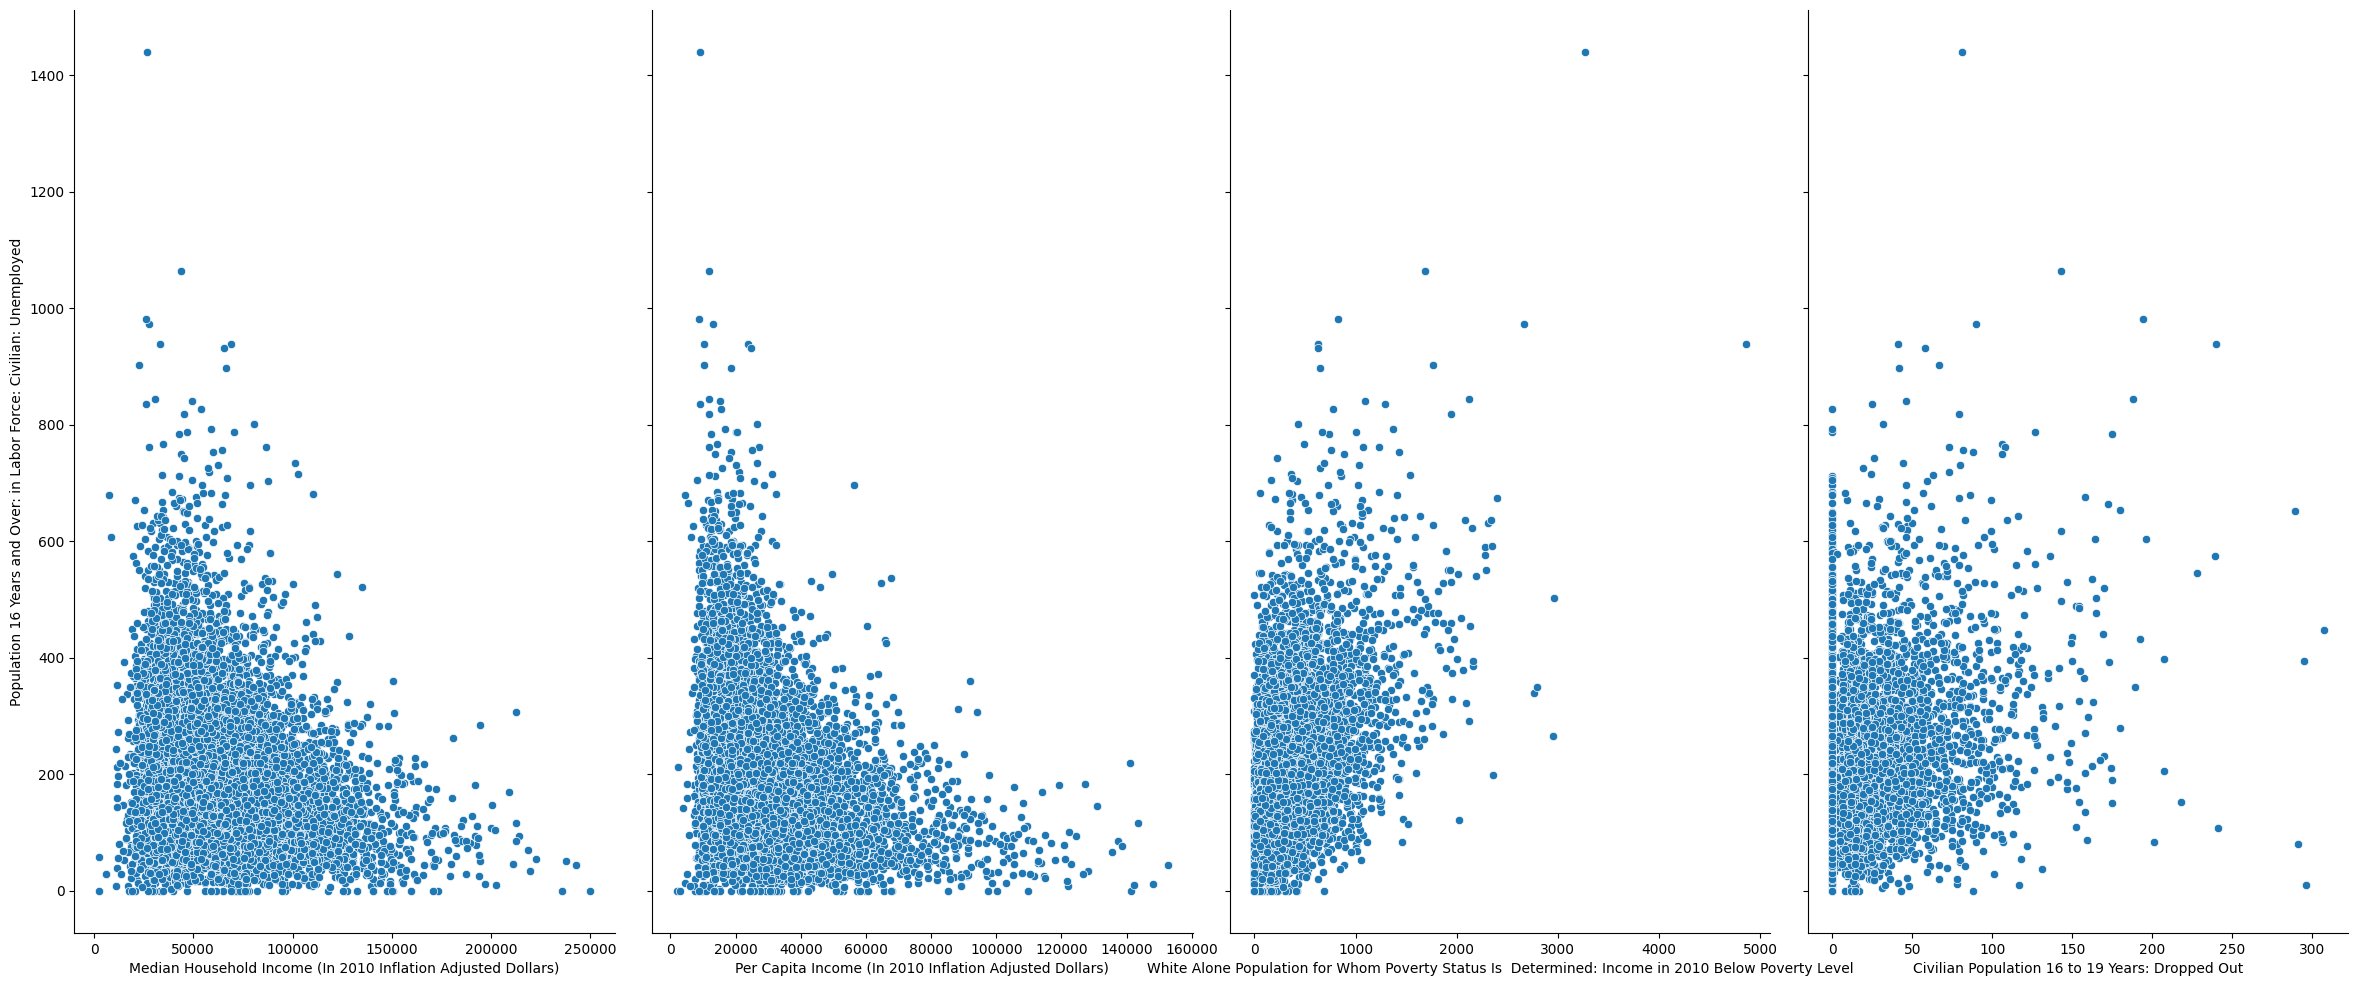

In [46]:
sns.pairplot(data = ca_new_clean, x_vars = ['Median Household Income (In 2010 Inflation Adjusted Dollars)',
                                            'Per Capita Income (In 2010 Inflation Adjusted Dollars)', 
                                            'White Alone Population for Whom Poverty Status Is  Determined: Income in 2010 Below Poverty Level', 
                                            'Civilian Population 16 to 19 Years: Dropped Out'],
            y_vars = ['Population 16 Years and Over: in Labor Force: Civilian: Unemployed'],
            height = 10, aspect = 0.6)

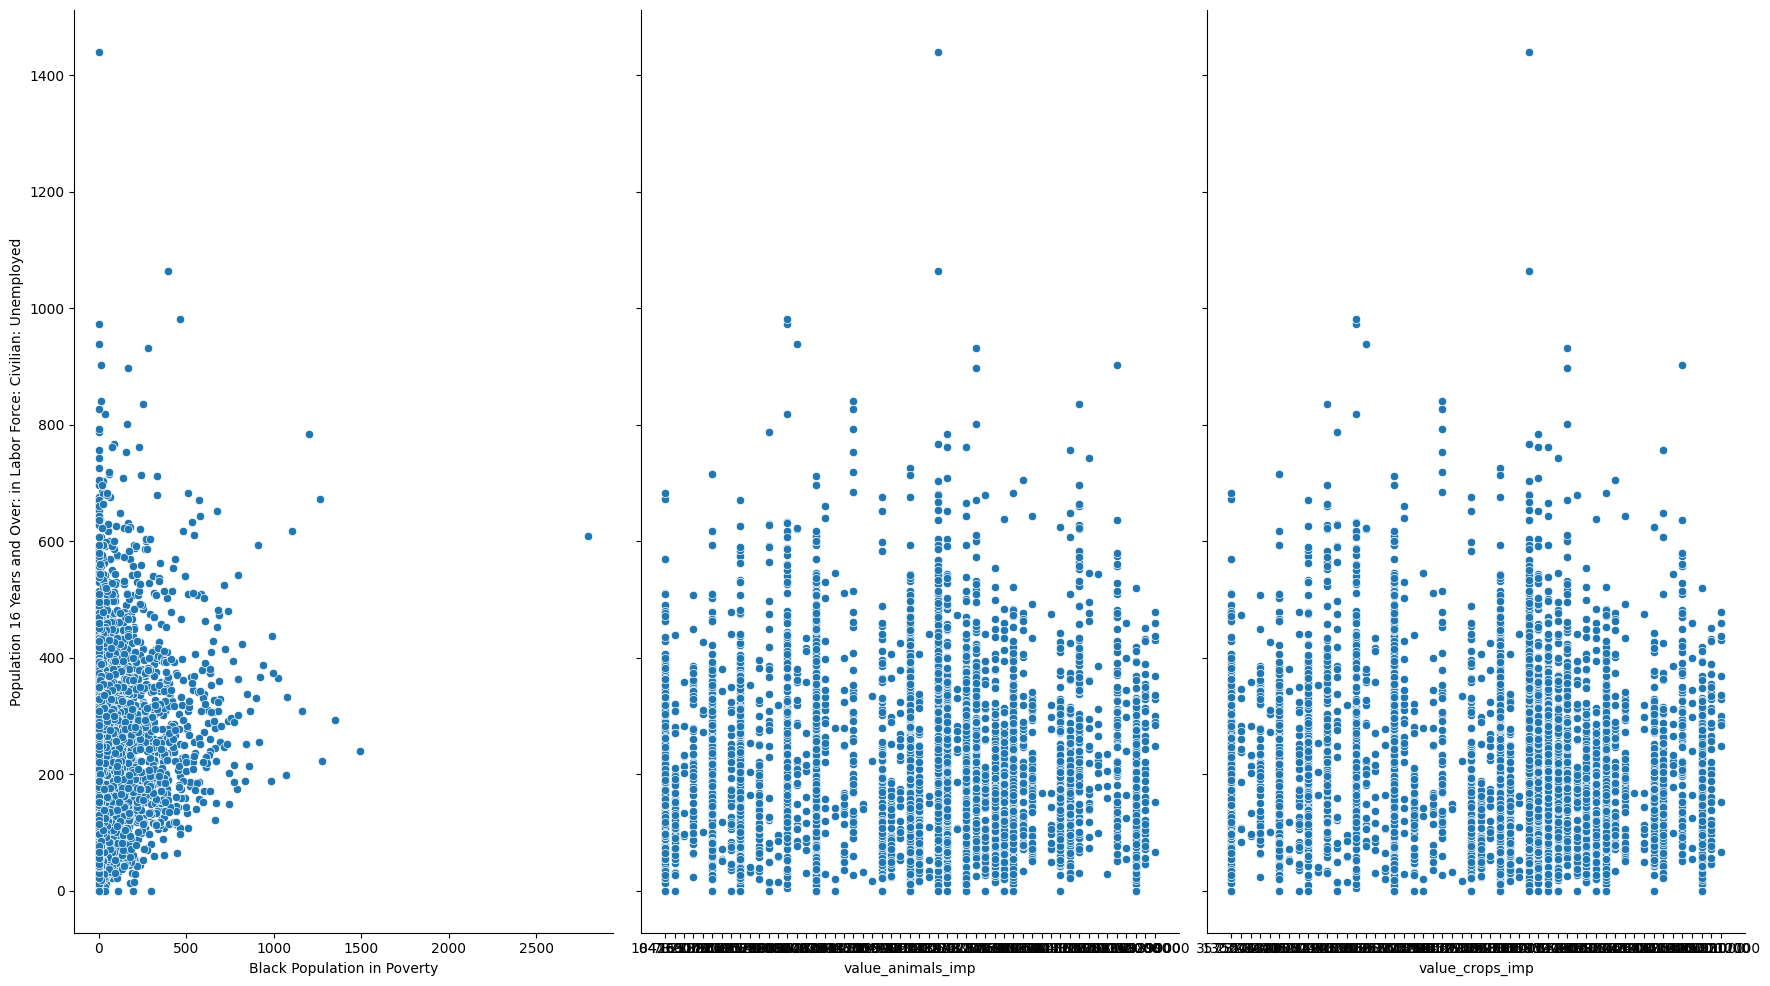

In [136]:
sns.pairplot(data = ca_new_clean, x_vars = ['Black Population in Poverty', 
                                            'value_animals_imp', 'value_crops_imp'],
            y_vars = ['Population 16 Years and Over: in Labor Force: Civilian: Unemployed'],
            height = 10, aspect = 0.6)

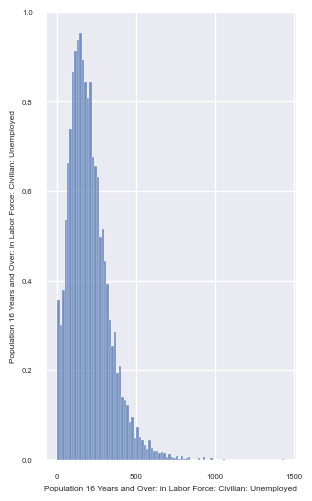

In [27]:
sns.pairplot(data = ca_new_clean, x_vars = ['Population 16 Years and Over: in Labor Force: Civilian: Unemployed'],
            y_vars = ['Population 16 Years and Over: in Labor Force: Civilian: Unemployed'],
            height = 5, aspect = 0.6)
sns.set(font_scale=1) # from stack exchange 

##### References 
* https://stackoverflow.com/questions/31966494/compare-1-independent-vs-many-dependent-variables-using-seaborn-pairplot-in-an-h
* https://stackoverflow.com/questions/33446029/how-to-change-a-figures-size-in-python-seaborn-package
* Changing font size for seaborn plot: https://stackoverflow.com/questions/58494836/changing-font-size-for-seaborn-pairplot

In [127]:
# getting the median number of census tracts per county
county_tracts = pd.DataFrame()
county_tracts["County"] = ca_new_clean["County"].unique()
county_tracts["Number_of_Tracts"] = ca_new_clean.groupby(["County"]).size().values

In [128]:
len(county_tracts) # 58 counties in california

58

### Creating the Train/Test Split

In [24]:
# trying a new train test split strategy
df_x = ca_new_clean.iloc[: , [4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20]]

In [25]:
df_y = ca_new_clean.iloc[:, 14]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y.values, test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6378, 16) (6378,)
(1595, 16) (1595,)


In [27]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

### Standardizing the Features

In [28]:
# standardizing the indepedent variables, or features
train_scalar = StandardScaler()
x_train_scaled = train_scalar.fit_transform(x_train)
x_test_scaled = train_scalar.transform(x_test)

### Creating Polynomial Features

In [29]:
# creating quadratic features
poly_2 = PolynomialFeatures(2)
x_train_poly2 = poly_2.fit_transform(x_train_scaled)
x_test_poly2 = poly_2.transform(x_test_scaled)

In [30]:
# creating polynomial features of degree 3
poly_3 = PolynomialFeatures(3)
x_train_poly3 = poly_3.fit_transform(x_train_scaled)
x_test_poly3 = poly_3.transform(x_test_scaled)

### Creating and Training the Models

#### Model 1: Linear Regression 

In [30]:
m1 = LinearRegression()
m1.fit(x_train_scaled, y_train)

LinearRegression()

In [31]:
print(mean_squared_error(y_train, m1.predict(x_train_scaled)))
print(r2_score(y_train, m1.predict(x_train_scaled)))

7458.24606646268
0.5462081955790514


#### Model 2: Polynomial Regression (Degree 2)

In [32]:
m2 = LinearRegression()
m2.fit(x_train_poly2, y_train)

LinearRegression()

In [33]:
print(mean_squared_error(y_train, m2.predict(x_train_poly2)))
print(r2_score(y_train, m2.predict(x_train_poly2)))

6392.141306675573
0.6110745996014393


#### Model 3: Polynomial Regression (Degree 3)

In [34]:
m3 = LinearRegression()
m3.fit(x_train_poly3, y_train)

LinearRegression()

In [35]:
print(mean_squared_error(y_train, m3.predict(x_train_poly3)))
print(r2_score(y_train, m3.predict(x_train_poly3)))

4835.662944847723
0.7057774450240517


### Performing K-Fold Validation

* Used these sources to learn about k-fold cross validation:
    * https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation#K-Fold:-Classification-Example-
    * https://datascience.stackexchange.com/questions/41758/which-is-first-tuning-the-parameters-or-selecting-the-model 

#### Model 1: Linear Regression

In [36]:
score_lr_mse = cross_val_score(LinearRegression(), x_train_scaled, y_train, cv = 5, scoring = "neg_mean_squared_error")
print(f'MSE for each fold are: \n {score_lr_mse}')
print(f'Average MSE: {"{:.3f}".format(score_lr_mse.mean())}')

MSE for each fold are: 
 [-7371.64659839 -8895.62849227 -7234.58462228 -7410.15166574
 -7091.69711544]
Average MSE: -7600.742


In [37]:
score_lr_r2 = cross_val_score(LinearRegression(), x_train_scaled, y_train, cv = 5, scoring = "r2")
print(f'R-squared for each fold are: \n {score_lr_r2}')
print(f'Average R-squared: {"{:.3f}".format(score_lr_r2.mean())}')

R-squared for each fold are: 
 [0.52454281 0.4860695  0.55886491 0.54114067 0.57708167]
Average R-squared: 0.538


#### Model 2: Polynomial Regression (Degree 2)

In [38]:
score_m2_mse = cross_val_score(LinearRegression(), x_train_poly2, y_train, cv = 5, scoring = "neg_mean_squared_error")
print(f'MSE for each fold are: \n {score_m2_mse}')
print(f'Average MSE: {"{:.3f}".format(score_m2_mse.mean())}')

MSE for each fold are: 
 [-7212.00162981 -7619.40054318 -7460.14377235 -7904.59326752
 -7640.52510543]
Average MSE: -7567.333


In [39]:
score_m2_r2 = cross_val_score(LinearRegression(), x_train_poly2, y_train, cv = 5, scoring = "r2")
print(f'R-squared for each fold are: \n {score_m2_r2}')
print(f'Average R-squared: {"{:.3f}".format(score_m2_r2.mean())}')

R-squared for each fold are: 
 [0.53483961 0.5598015  0.54511124 0.51052333 0.54435193]
Average R-squared: 0.539


#### Model 3: Polynomial Regression (Degree 3) 

In [40]:
score_lr3_mse = cross_val_score(LinearRegression(), x_train_poly3, y_train, cv= 5, scoring="neg_mean_squared_error")
print(f'MSE for each fold are: {score_lr3_mse}')
print(f'Average MSE score: {"{:.3f}".format(score_lr3_mse.mean())}')

MSE for each fold are: [-115485.8100585  -389250.30746028  -40821.1060522   -44079.26412602
  -88610.64280316]
Average MSE score: -135649.426


In [43]:
score_lr3_r2 = cross_val_score(LinearRegression(), x_train_poly3, y_train, cv = 5, scoring = "r2")
print(f'R-squared for each fold are: \n {score_lr3_r2}')
print(f'Average R-squared score: {"{:.3f}".format(score_lr3_r2.mean())}')

R-squared for each fold are: 
 [ -3.71961172 -23.26691378  -1.6520354   -7.21541467 -11.69898859]
Average R-squared score: -9.511


### Tuning the Polynomial Regression (Degree 2)

Since the polynomial regression is severey overfit, I will regularize using Lasso. I tune the hyperparameter, lambda, to determine how strongly we should regularize.

#### Lasso Regression Tuning

In [44]:
grid_lasso_vals = [{
    'alpha': [0.001, 0.01, 1, 5, 10]
}]
grid_lasso = GridSearchCV(estimator=Lasso(), param_grid=grid_lasso_vals, scoring='r2', cv=5)

In [45]:
grid_lasso.fit(x_train_poly2, y_train)

/opt/export/course/phi543_gpu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.592e+07, tolerance: 8.504e+03
  model = cd_fast.enet_coordinate_descent(
/opt/export/course/phi543_gpu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.571e+07, tolerance: 8.270e+03
  model = cd_fast.enet_coordinate_descent(
/opt/export/course/phi543_gpu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.01, 1, 5, 10]}], scoring='r2')

In [46]:
grid_lasso.best_params_

{'alpha': 1}

#### Model 4: Lasso Regression (Alpha = 1, Polynomial Degree = 2)

In [31]:
m4 = Lasso(alpha=1)

In [32]:
m4.fit(x_train_poly2, y_train)

Lasso(alpha=1)

In [49]:
print(mean_squared_error(y_train, m4.predict(x_train_poly2)))
print(r2_score(y_train, m4.predict(x_train_poly2)))

6719.039538886163
0.5911847035943987


In [50]:
score_m4_mse = cross_val_score(Lasso(alpha=1), x_train_poly2, y_train, cv= 5, scoring="neg_mean_squared_error")
print(f'MSE for each fold are: {score_m4_mse}')
print(f'Average MSE score: {"{:.3f}".format(score_m4_mse.mean())}')

MSE for each fold are: [-7004.65951529 -7665.01594184 -7285.19238647 -6957.71434071
 -6777.18037586]
Average MSE score: -7137.953


In [51]:
score_m4_r2 = cross_val_score(Lasso(alpha=1), x_train_poly2, y_train, cv = 5, scoring = "r2")
print(f'R-squared for each fold are: \n {score_m4_r2}')
print(f'Average R-squared score: {"{:.3f}".format(score_m4_r2.mean())}')

R-squared for each fold are: 
 [0.54821278 0.55716615 0.55577906 0.56915698 0.5958381 ]
Average R-squared score: 0.565


### Testing the Final Model 

The polynomial regression (degree 2) with Lasso regularization performed better than linear regression on the training and validation sets. I now test the model at the census tract and county level.

In [52]:
print(mean_squared_error(y_test, m4.predict(x_test_poly2)))
print(r2_score(y_test, m4.predict(x_test_poly2)))

6887.803633351953
0.5477516808742389


### Inspecting the Final Model

In [33]:
m4_coef = []
m4_coef.append(m4.intercept_)
for index, value in zip(range(len(m4.coef_)), m4.coef_):
    m4_coef.append(value)

m4_features = list(poly_2.get_feature_names_out(df_x.columns))
m4_dict = {m4_features[i]:m4_coef[i] for i in range(len(m4_features))}
m4_dict_clean = {features:coefficients for (features, coefficients) in m4_dict.items() if coefficients != 0}
m4_df = pd.DataFrame(m4_dict_clean.items(), columns=['Feature', 'Coefficient'])

In [34]:
m4_df.sort_values('Coefficient')

,Feature,Coefficient
7,White Alone Population for Whom Poverty Status...,-16.648154
6,Per Capita Income (In 2010 Inflation Adjusted ...,-12.762774
3,Total Population: Black or African American Alone,-10.323662
16,Total Population White Alone Population for Wh...,-9.814384
11,Total Population Area (Land),-6.344695
34,Total Population: White Alone Total Population...,-4.799711
26,Male Population 25 Years and Over: Total Popul...,-4.677998
56,White Alone Population for Whom Poverty Status...,-3.267733
35,Total Population: White Alone Total Population...,-3.226087
21,Population Density (Per Sq. Mile) Black or Afr...,-3.108920


In [43]:
premu_tract = permutation_importance(m4, x_test_poly2, y_test)
graph_data_tract = pd.DataFrame.from_dict(premu_tract, orient='index', columns=poly_2.get_feature_names_out(df_x.columns))
graph_data_tract = pd.DataFrame(graph_data_tract.iloc[0, :])
graph_data_tract = graph_data_tract.sort_values("importances_mean", key=abs)

In [44]:
graph_data_tract_clean = graph_data_tract.iloc[-10:, :]
graph_data_tract_clean = graph_data_tract_clean.reset_index()

In [45]:
tract_features = [
    "Population Density*High School Dropout",
    "Value of Animal Products Squared",
    "Black Population",
    "Male Educational Attainment",
    "Total Population*White Population in Poverty",
    "African American Population in Poverty",
    "Value of Animal Products",
    "Per Capita Income",
    "White Population in Poverty", 
    "Total Population"
]
graph_data_tract_clean["features"] = tract_features

Text(0, 0.5, 'Change in Mean Squared Error')

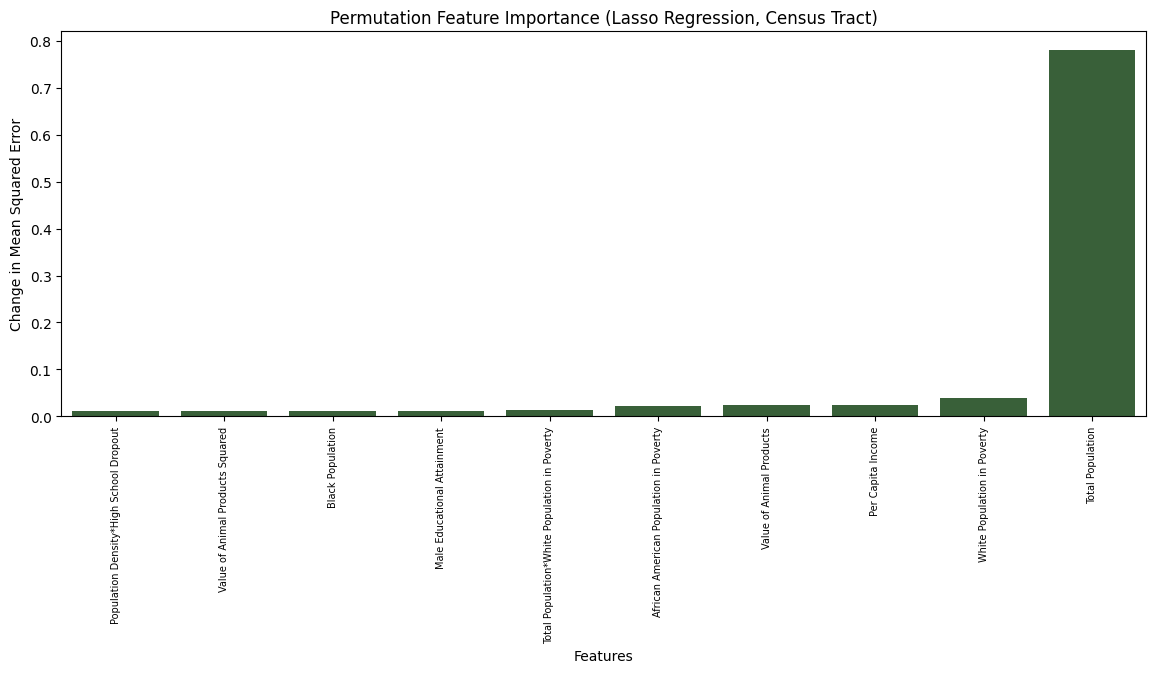

In [46]:
color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         ) 
plt.figure(figsize=[14,5])
#plt.axhline(0, c='black')
#[plt.axvline(i + 0.5, linestyle='--', c='black') for i in range(0, len(county_poly_2.get_feature_names_out(county_x.columns)))]
sns.barplot(x=graph_data_tract_clean['features'], y=graph_data_tract_clean['importances_mean'], color = color)
plt.title("Permutation Feature Importance (Lasso Regression, Census Tract)")
plt.xlabel("Features")
plt.xticks(size = 7, rotation=90)
plt.ylabel("Change in Mean Squared Error")

## County Data and Models

### Loading and Cleaning the County Data

In [29]:
acs_county = pd.read_csv("/Users/conniegong/Downloads/SML/SML 312/Final Project/Data/ACS 2010 County.csv")

In [42]:
acs_county.head()

,FIPS,Name of Area,Total Population,Population Density (Per Sq. Mile),Area (Land),Male Population 25 Years and Over:,Total Population: White Alone,Total Population: Black or African American Alone,Total Population: Asian Alone,Total Population: Not Hispanic or Latino,"Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)",Civilian Population in Labor Force 16 Years and Over: Unemployed,Median Household Income (In 2010 Inflation Adjusted Dollars),Per Capita Income (In 2010 Inflation Adjusted Dollars),White Alone Population for Whom Poverty Status Is Determined: Income in 2010 Below Poverty Level,Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 Below Poverty Level,Male Population 25 Years and Over: High School Graduate or More (Includes Equivalency)
0,6001,"Alameda County, California",1477980,1999.926000,739.017355,477926,677040,186492,383891,1154673,4093,66540,69384,33961,59099,38988,410088
1,6003,"Alpine County, California",1176,1.592779,738.332329,472,758,0,48,1113,9,83,63478,32159,89,0,433
2,6005,"Amador County, California",38327,64.460300,594.583067,15894,33641,714,428,33761,147,1845,54758,26329,2339,34,13536
3,6007,"Butte County, California",218635,133.602100,1636.464453,67067,182022,3220,8690,189123,410,11732,43170,23404,29002,1256,57331
4,6009,"Calaveras County, California",45994,45.091610,1020.012312,16522,42099,467,631,41399,116,1598,54971,28408,3218,0,14886


In [30]:
# merge with the crops and animal dataframes
county_numbers_2 = pd.read_csv("/Users/conniegong/Downloads/SML/SML 312/Final Project/Data/County Numbers 2.csv")

In [44]:
county_numbers_2.head()

,Area Name,County Number
0,"Alameda County, California",1
1,"Alpine County, California",3
2,"Amador County, California",5
3,"Butte County, California",7
4,"Calaveras County, California",9


In [31]:
county_numbers_2 = county_numbers_2.rename(columns={"County Number":"County", "Area Name":"Name of Area"})

In [32]:
county_crops_clean_2 = county_crops_clean.merge(county_numbers_2, on="County", how="left")
county_crops_clean_2 = county_crops_clean_2.iloc[:, [1,2]]
county_crops_clean_2.head()

,Value of Crops_imp,Name of Area
0,3.575200e+07,"Alameda County, California"
1,6.440600e+07,"Contra Costa County, California"
2,6.936100e+07,"Lake County, California"
3,1.107800e+07,"Marin County, California"
4,4.077795e+09,"Monterey County, California"


In [33]:
county_animals_clean_2 = county_animals_clean.merge(county_numbers_2, on="County", how="left")
county_animals_clean_2 = county_animals_clean_2.iloc[:, [1,2]]
county_animals_clean_2.head()

,Value of Animal Products_imp,Name of Area
0,10413000.0,"Alameda County, California"
1,18823000.0,"Contra Costa County, California"
2,2508000.0,"Lake County, California"
3,84263000.0,"Marin County, California"
4,38354000.0,"Monterey County, California"


In [34]:
acs_county = acs_county.merge(county_crops_clean_2, on="Name of Area", how="left")

In [35]:
acs_county = acs_county.merge(county_animals_clean_2, on="Name of Area", how="left")

In [30]:
acs_county.head()

,FIPS,Name of Area,Total Population,Population Density (Per Sq. Mile),Area (Land),Male Population 25 Years and Over:,Total Population: White Alone,Total Population: Black or African American Alone,Total Population: Asian Alone,Total Population: Not Hispanic or Latino,"Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)",Civilian Population in Labor Force 16 Years and Over: Unemployed,Median Household Income (In 2010 Inflation Adjusted Dollars),Per Capita Income (In 2010 Inflation Adjusted Dollars),White Alone Population for Whom Poverty Status Is Determined: Income in 2010 Below Poverty Level,Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 Below Poverty Level,Male Population 25 Years and Over: High School Graduate or More (Includes Equivalency),Value of Crops_imp,Value of Animal Products_imp
0,6001,"Alameda County, California",1477980,1999.926000,739.017355,477926,677040,186492,383891,1154673,4093,66540,69384,33961,59099,38988,410088,35752000.0,10413000.0
1,6003,"Alpine County, California",1176,1.592779,738.332329,472,758,0,48,1113,9,83,63478,32159,89,0,433,507638000.0,84263000.0
2,6005,"Amador County, California",38327,64.460300,594.583067,15894,33641,714,428,33761,147,1845,54758,26329,2339,34,13536,23202000.0,7827000.0
3,6007,"Butte County, California",218635,133.602100,1636.464453,67067,182022,3220,8690,189123,410,11732,43170,23404,29002,1256,57331,507638000.0,16517000.0
4,6009,"Calaveras County, California",45994,45.091610,1020.012312,16522,42099,467,631,41399,116,1598,54971,28408,3218,0,14886,9613000.0,17822000.0


In [36]:
acs_county = acs_county.rename(columns = {"Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)":"Civilian Population 16 to 19 Years: Dropped Out"})

### Exploratory Data Analysis

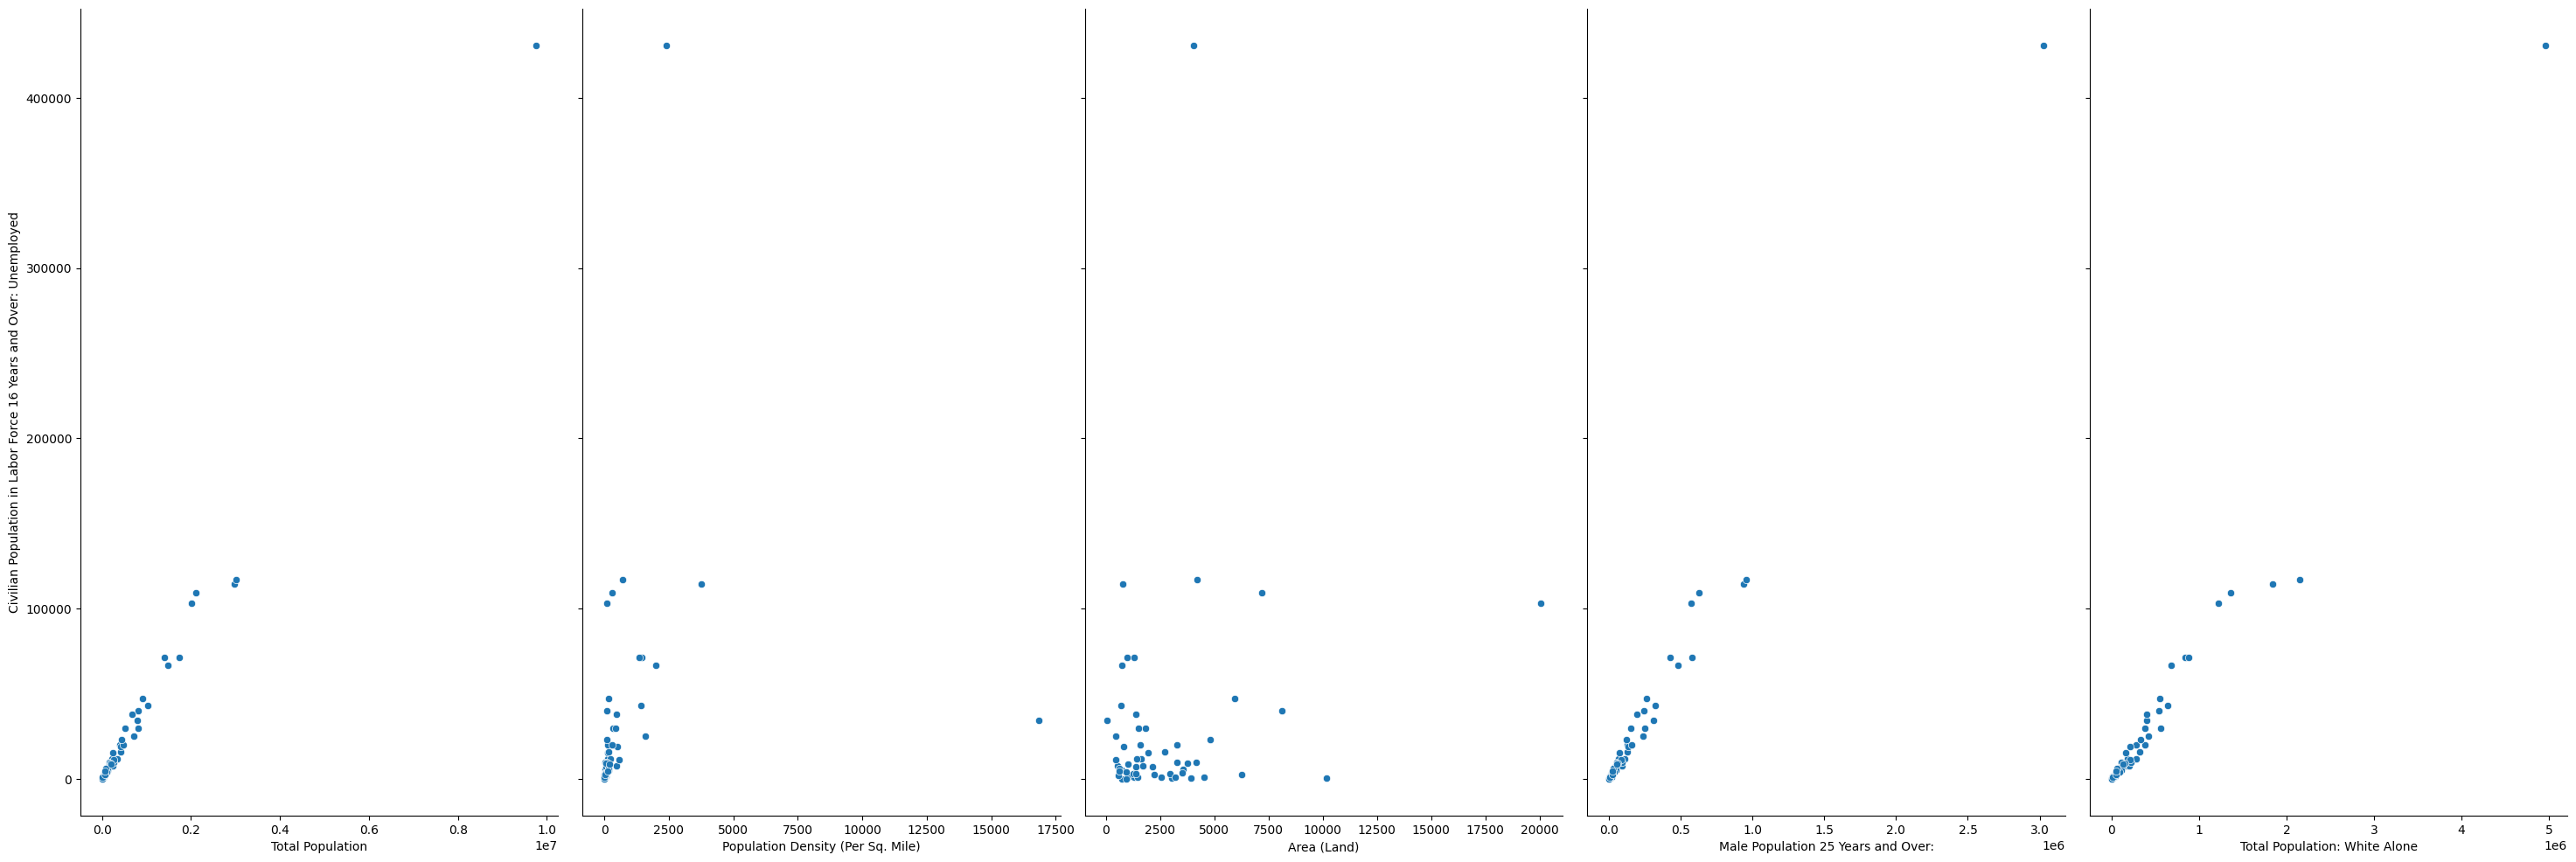

In [34]:
sns.pairplot(data = acs_county, x_vars = ['Total Population', 'Population Density (Per Sq. Mile)', 
                                          'Area (Land)', 'Male Population 25 Years and Over:', 'Total Population: White Alone'],
            y_vars = ['Civilian Population in Labor Force 16 Years and Over: Unemployed'],
            height = 10, aspect = 0.6)

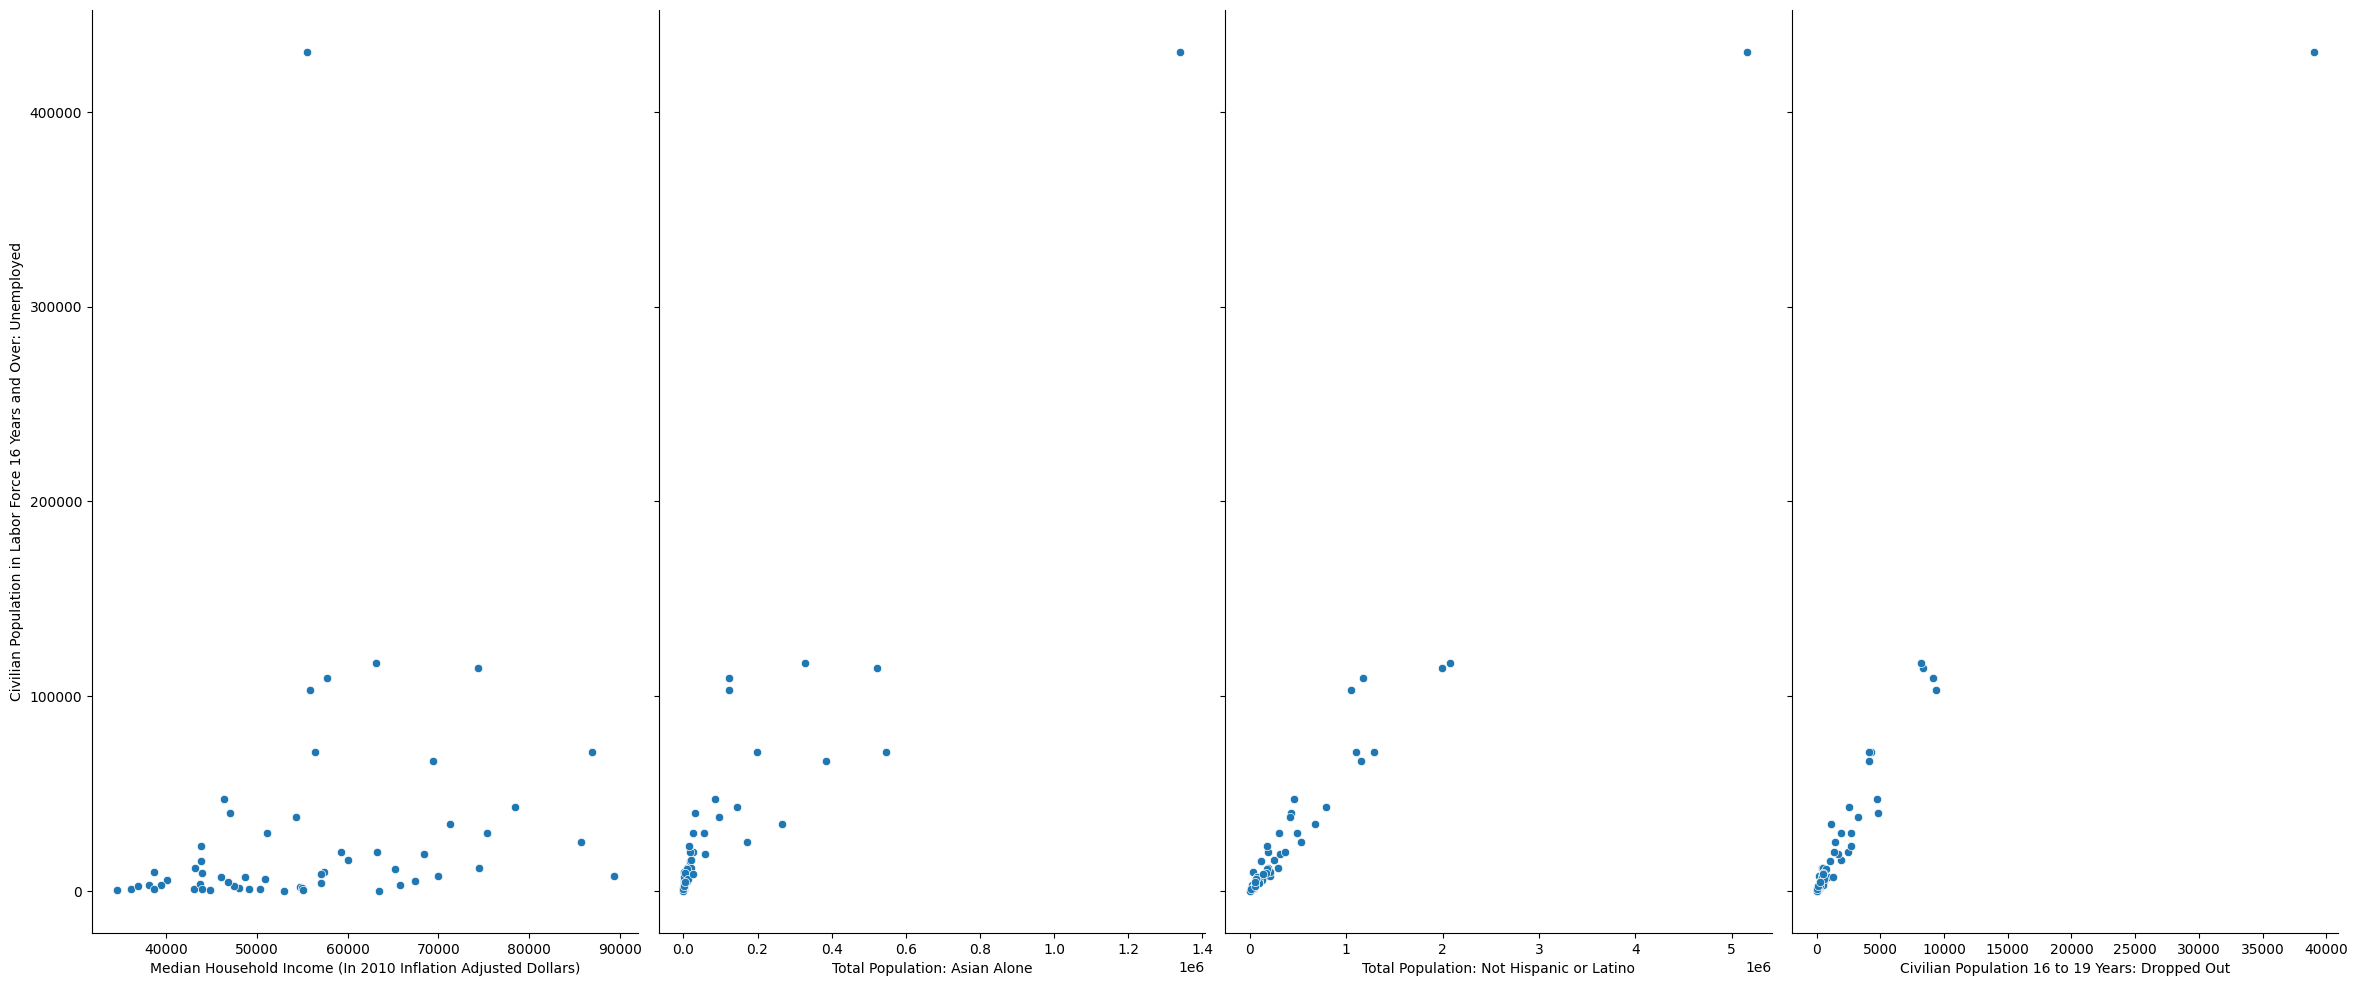

In [40]:
sns.pairplot(data = acs_county, x_vars = ['Median Household Income (In 2010 Inflation Adjusted Dollars)', 'Total Population: Asian Alone', 
                                          'Total Population: Not Hispanic or Latino', 'Civilian Population 16 to 19 Years: Dropped Out'],
            y_vars = ['Civilian Population in Labor Force 16 Years and Over: Unemployed'],
            height = 10, aspect = 0.6)

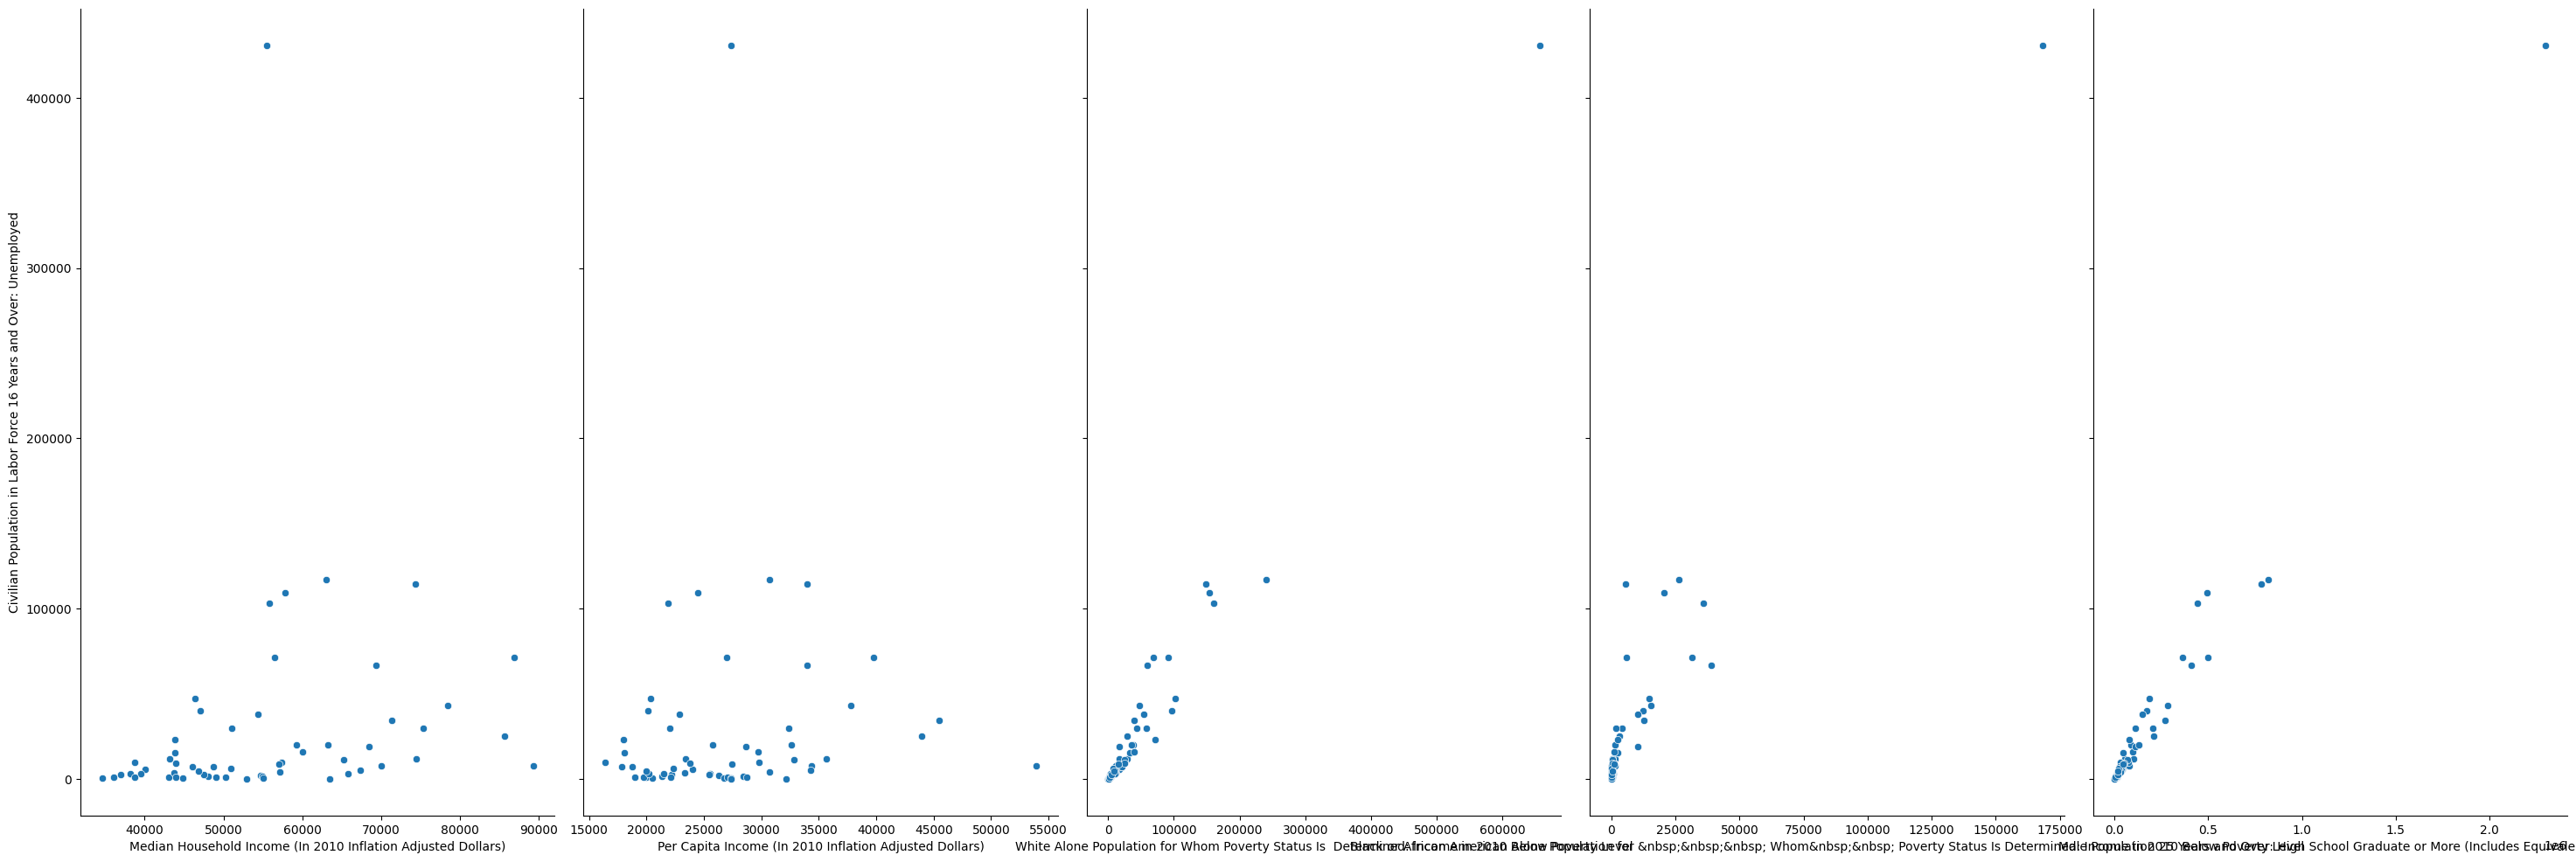

In [36]:
sns.pairplot(data = acs_county, x_vars = ['Median Household Income (In 2010 Inflation Adjusted Dollars)','Per Capita Income (In 2010 Inflation Adjusted Dollars)', 
                                          'White Alone Population for Whom Poverty Status Is  Determined: Income in 2010 Below Poverty Level', 
                                          'Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 Below Poverty Level',
                                          'Male Population 25 Years and Over: High School Graduate or More (Includes Equivalency)'],
            y_vars = ['Civilian Population in Labor Force 16 Years and Over: Unemployed'],
            height = 10, aspect = 0.6)

In [1]:
acs_county = acs_county.rename(columns={"White Alone Population for Whom Poverty Status Is  Determined: Income in 2010 Below Poverty Level":"White Population in Poverty",
                          "Black or African American Alone Population for &nbsp;&nbsp;&nbsp; Whom&nbsp;&nbsp; Poverty Status Is Determined: Income in 2010 Below Poverty Level":"Black Population in Poverty"})

NameError: name 'acs_county' is not defined

<Axes: >

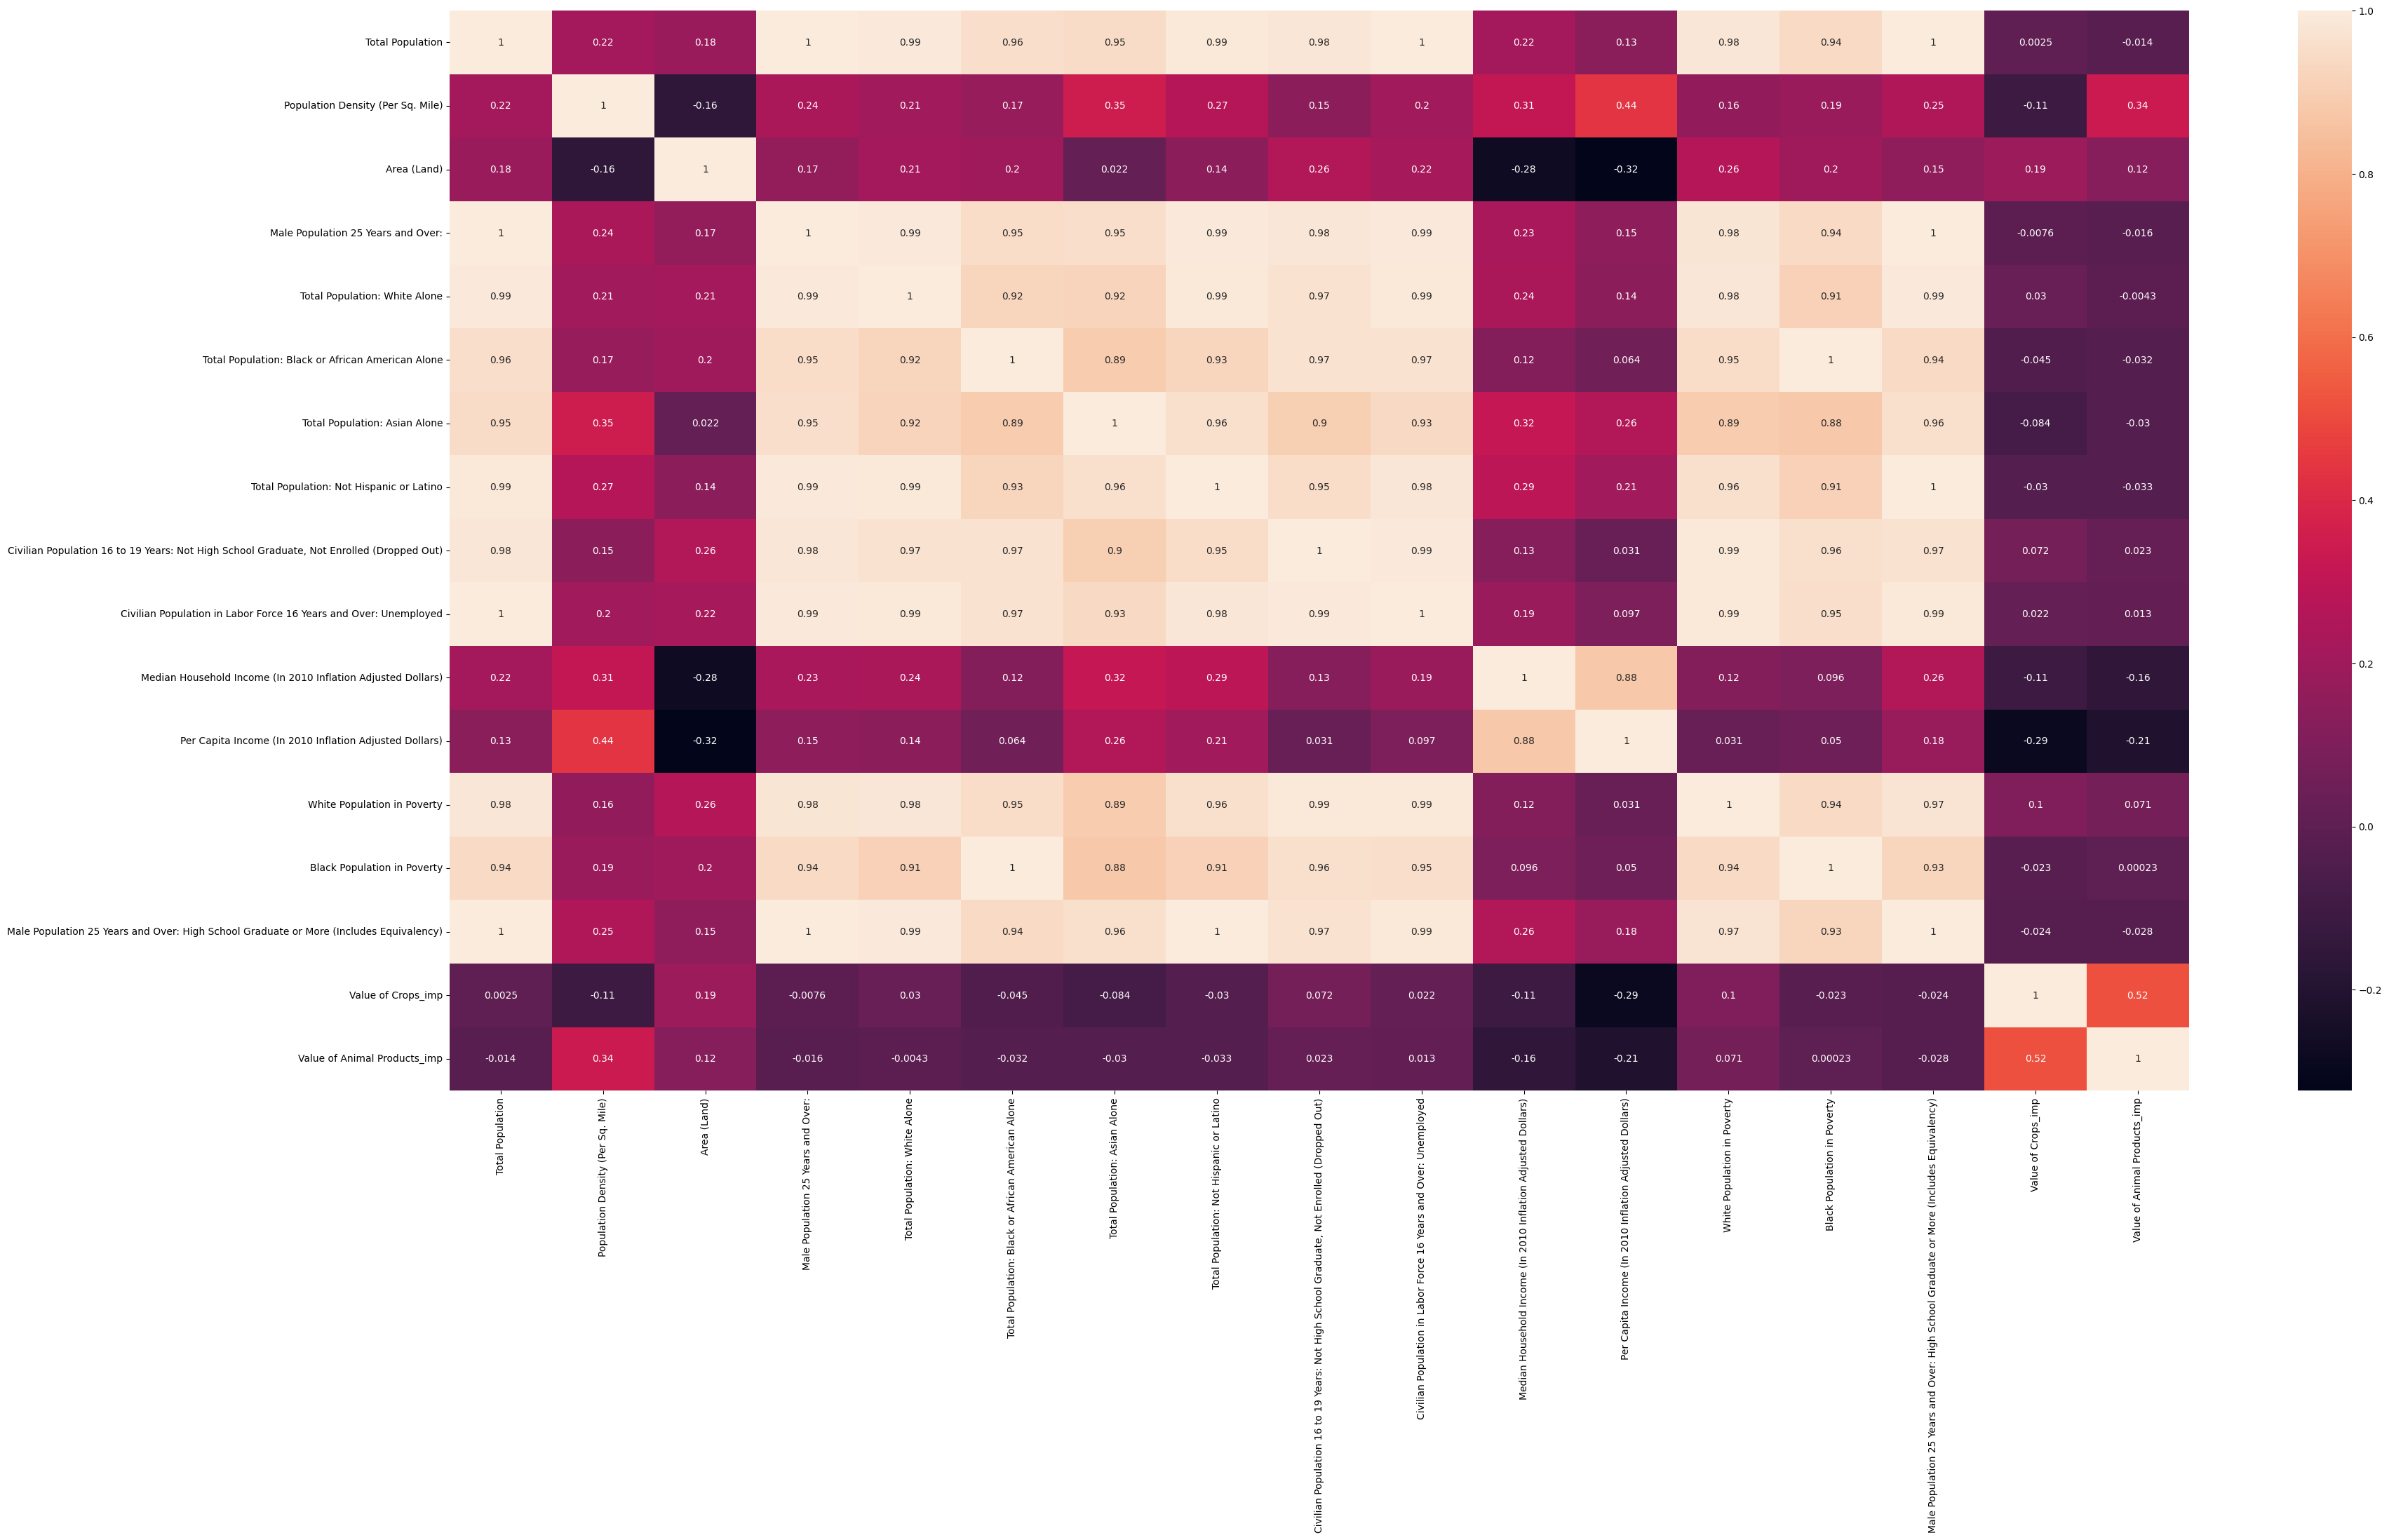

In [184]:
plt.figure(figsize = (40, 20))
sns.heatmap(acs_county.iloc[:, 2:].corr(), annot = True)

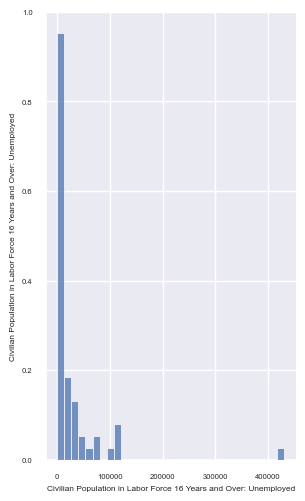

In [41]:
sns.pairplot(data = acs_county, x_vars = ['Civilian Population in Labor Force 16 Years and Over: Unemployed'],
            y_vars = ['Civilian Population in Labor Force 16 Years and Over: Unemployed'],
            height = 5, aspect = 0.6)
sns.set(font_scale=0.5)

### Creating the Training and Test Sets

In [31]:
county_x = acs_county.iloc[:, [2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18]]

In [26]:
county_x.shape

(58, 16)

In [32]:
county_y = acs_county.iloc[:, 11]

In [63]:
county_x_train, county_x_test, county_y_train, county_y_test = train_test_split(county_x, county_y.values, 
                                                                                test_size=0.2, random_state = 42)
print(county_x_train.shape, county_y_train.shape)
print(county_x_test.shape, county_y_test.shape)

(46, 16) (46,)
(12, 16) (12,)


### Standardizing the Variables

In [64]:
# standardizing all of the independent variables, or features 
full_train_scalar_2 = StandardScaler()
county_x_scaled = full_train_scalar_2.fit_transform(county_x)

In [65]:
# standardizing the indepedent variables, or features
train_scalar_2 = StandardScaler()
county_x_train_scaled = train_scalar_2.fit_transform(county_x_train)
county_x_test_scaled = train_scalar_2.transform(county_x_test)

### Creating Polynomial Features (Degree = 2)

In [66]:
# with the training and test set
county_poly_2 = PolynomialFeatures(2)
county_x_train_poly = county_poly_2.fit_transform(county_x_train_scaled)
county_x_test_poly = county_poly_2.transform(county_x_test_scaled)

### Creating and Training the Models

#### Using the Lasso Regression Model (Polynomial Degree = 2) on County Level Data

In [59]:
print(mean_squared_error(county_y.values, m4.predict(full_county_poly_2)))
print(r2_score(county_y.values, m4.predict(full_county_poly_2)))

NameError: name 'm4' is not defined

#### Fitting a New Lasso Regression Model (Polynomial Degree = 2) on County Level Data

In [74]:
county_model = Lasso(alpha=1)
county_model.fit(county_x_train_poly, county_y_train)

Lasso(alpha=1)

In [75]:
print(mean_squared_error(county_y_train, county_model.predict(county_x_train_poly)))
print(r2_score(county_y_train, county_model.predict(county_x_train_poly)))

48799.61346030654
0.9999892948649167


In [76]:
score_county_mse = cross_val_score(Lasso(alpha=1), county_x_train_poly, county_y_train, cv = 5, scoring = "neg_mean_squared_error")
print(f'MSE for each fold are: \n {score_county_mse}')
print(f'Average MSE: {"{:.3f}".format(score_county_mse.mean())}')

MSE for each fold are: 
 [-3.04556531e+07 -3.29434245e+07 -2.56980146e+08 -1.70235028e+09
 -2.41010763e+09]
Average MSE: -886567426.230


In [77]:
score_county_r2 = cross_val_score(Lasso(alpha=1), county_x_train_poly, county_y_train, cv = 5, scoring = "r2")
print(f'R-squared for each fold are: \n {score_county_r2}')
print(f'Average R-squared score: {"{:.3f}".format(score_county_r2.mean())}')

R-squared for each fold are: 
 [ 0.97320001  0.93976848  0.84989265 -0.75916262  0.85901551]
Average R-squared score: 0.573


### Tuning the Hyperparameter Alpha
The above Lasso regression was overfit because the validation r-squared was over 40% lower than the training r-squared. I conduct a grid search of alpha values for the Lasso Regression (Polynomial Degree = 2) to account for overfitting.

In [78]:
grid_county_vals = [{
    'alpha': [1, 5, 10, 100, 1000]
}]
grid_county = GridSearchCV(estimator=Lasso(), param_grid=grid_county_vals, scoring='r2', cv=5)

In [79]:
grid_county.fit(county_x_train_poly, county_y_train)

/opt/export/course/phi543_gpu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.249e+07, tolerance: 2.026e+07
  model = cd_fast.enet_coordinate_descent(
/opt/export/course/phi543_gpu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.037e+07, tolerance: 1.941e+07
  model = cd_fast.enet_coordinate_descent(
/opt/export/course/phi543_gpu/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [1, 5, 10, 100, 1000]}], scoring='r2')

In [80]:
grid_county.best_params_

{'alpha': 1000}

### Creating a Lasso Regression (Alpha = 1000, Polynomial Degree = 2)

In [67]:
county_m2 = Lasso(alpha=1000)
county_m2.fit(county_x_train_poly, county_y_train)

Lasso(alpha=1000)

In [32]:
print(mean_squared_error(county_y_train, county_m2.predict(county_x_train_poly)))
print(r2_score(county_y_train, county_m2.predict(county_x_train_poly)))

17331149.339653444
0.9961980785978894


In [33]:
score_county_m2_mse = cross_val_score(Lasso(alpha=1000), county_x_train_poly, county_y_train, cv = 5, scoring = "neg_mean_squared_error")
print(f'MSE for each fold are: \n {score_county_m2_mse}')
print(f'Average MSE: {"{:.3f}".format(score_county_m2_mse.mean())}')

MSE for each fold are: 
 [-6.63497849e+07 -5.11061026e+07 -2.65173842e+08 -3.10675207e+07
 -8.71578472e+08]
Average MSE: -257055144.458


/Users/conniegong/miniconda3/envs/newenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.187e+07, tolerance: 1.974e+07
  model = cd_fast.enet_coordinate_descent(


In [34]:
score_county_m2_r2 = cross_val_score(Lasso(alpha=1000), county_x_train_poly, county_y_train, cv = 5, scoring = "r2")
print(f'R-squared for each fold are: \n {score_county_m2_r2}')
print(f'Average R-squared score: {"{:.3f}".format(score_county_m2_r2.mean())}')

R-squared for each fold are: 
 [0.94161433 0.90656107 0.84510654 0.96789567 0.94901512]
Average R-squared score: 0.922


/Users/conniegong/miniconda3/envs/newenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.187e+07, tolerance: 1.974e+07
  model = cd_fast.enet_coordinate_descent(


### Creating a Linear Regression 
The above Lasso regression model performed quite well; its training and validation r-squared values were above 90%. I run a linear regression model to see if non-polynomial features would perform as well. 

In [60]:
county_linear_model = LinearRegression()
county_linear_model.fit(county_x_train_scaled, county_y_train)

LinearRegression()

In [61]:
print(mean_squared_error(county_y_train, county_linear_model.predict(county_x_train_scaled)))
print(r2_score(county_y_train, county_linear_model.predict(county_x_train_scaled)))

2939000.3527227114
0.9993552736680734


In [62]:
score_test_r2 = cross_val_score(LinearRegression(), county_x_train_scaled, county_y_train, cv = 5, scoring = "r2")
print(f'R-squared for each fold are: \n {score_test_r2}')
print(f'Average R-squared score: {"{:.3f}".format(score_test_r2.mean())}')

R-squared for each fold are: 
 [0.89079545 0.97441855 0.9677127  0.99565085 0.89809789]
Average R-squared score: 0.945


In [63]:
score_test_mse = cross_val_score(LinearRegression(), county_x_train_scaled, county_y_train, cv = 5, scoring = "neg_mean_squared_error")
print(f'MSE for each fold are: \n {score_test_mse}')
print(f'Average MSE score: {"{:.3f}".format(score_test_mse.mean())}')

MSE for each fold are: 
 [-1.24100626e+08 -1.39916871e+07 -5.52750805e+07 -4.20869465e+06
 -1.74200052e+09]
Average MSE score: -387915320.913


### Testing the Models 

#### Testing the Models on County Level Data

In [71]:
print(mean_squared_error(county_y_test, county_linear_model.predict(county_x_test_scaled)))
print(r2_score(county_y_test, county_linear_model.predict(county_x_test_scaled)))

607540626.6959891
-0.7385686165629288


In [72]:
print(mean_squared_error(county_y_test, county_m2.predict(county_x_test_poly)))
print(r2_score(county_y_test, county_m2.predict(county_x_test_poly)))

9693361.273932917
0.9722609929947957


#### Testing the Models on Census Tract Level Data

In [69]:
print(mean_squared_error(y_train, county_m2.predict(x_train_poly2)))
print(r2_score(y_train, county_m2.predict(x_train_poly2)))

3608699995.1994576
-219567.84605875114


In [70]:
print(mean_squared_error(y_test, county_m2.predict(x_test_poly2)))
print(r2_score(y_test, county_m2.predict(x_test_poly2)))

2868066355.057192
-188314.21008164098


### Inspecting the Final Models

In [173]:
county_m2_coef = []
county_m2_coef.append(county_m2.intercept_)
for index, value in zip(range(len(county_m2.coef_)), county_m2.coef_):
    county_m2_coef.append(value)

In [174]:
county_m2_features = list(county_poly_2.get_feature_names_out(county_x.columns))

In [175]:
county_m2_dict = {county_m2_features[i]:county_m2_coef[i] for i in range(len(county_m2_features))}

In [176]:
county_m2_dict_clean = {features:coefficients for (features, coefficients) in county_m2_dict.items() if coefficients != 0}
county_m2_df = pd.DataFrame(county_m2_dict_clean.items(), columns=['Feature', 'Coefficient'])

In [177]:
county_m2_df.sort_values("Coefficient")

,Feature,Coefficient
8,Per Capita Income (In 2010 Inflation Adjusted ...,-91.823184
9,Value of Crops_imp Value of Animal Products_imp,19.037240
6,Total Population: Asian Alone Total Population...,153.239974
5,Total Population: Black or African American Al...,288.156145
4,Area (Land) Male Population 25 Years and Over:,618.637341
7,Civilian Population 16 to 19 Years: Not High S...,1401.407180
1,Total Population: Black or African American Alone,8619.026681
3,Median Household Income (In 2010 Inflation Adj...,23335.485392
2,Civilian Population 16 to 19 Years: Not High S...,25802.116086
0,1,29582.785557


In [165]:
premu_county = permutation_importance(county_m2, county_x_test_poly, county_y_test)

In [166]:
graph_data_county = pd.DataFrame.from_dict(premu_county, orient='index', columns=county_poly_2.get_feature_names_out(county_x.columns))
graph_data_county = pd.DataFrame(graph_data_county.iloc[0, :])
graph_data_county = graph_data_county.sort_values("importances_mean", key=abs)

In [167]:
graph_data_county_clean = graph_data_county.iloc[-10:, :]
graph_data_county_clean = graph_data_county_clean.reset_index()

In [170]:
graph_data_county_clean

,index,importances_mean,features
0,Male Population 25 Years and Over: Total Popul...,0.0,Population Density*Drop Out
1,Value of Animal Products_imp^2,0.000359,Value of Animal Products Squared
2,Total Population: Black or African American Al...,0.000609,Total African American Population
3,Civilian Population 16 to 19 Years: Not High S...,-0.000615,Male Educational Attainment
4,Total Population: Asian Alone^2,0.000684,Total Population*White Population in Poverty
5,Per Capita Income (In 2010 Inflation Adjusted ...,-0.001591,Black Population in Poverty
6,Area (Land)^2,-0.003529,Value of Animal Products
7,Total Population: White Alone,0.046309,Per Capita
8,Civilian Population 16 to 19 Years: Not High S...,0.135939,White Population in Poverty
9,Total Population: Not Hispanic or Latino,0.695438,Total Population


In [187]:
county_features = [
    "Male Population*Total Population",
    "Value of Animal Products Squared",
    "Total African American Population Squared",
    "High School Dropout Squared",
    "Total Asian Population Squared",
    "Per Capita Income Squared",
    "Land Area Squared",
    "White Population",
    "High School Dropout", 
    "Total Population: Non-Hispanic"
]
graph_data_county_clean["features"] = county_features

Text(0, 0.5, 'Change in Mean Squared Error')

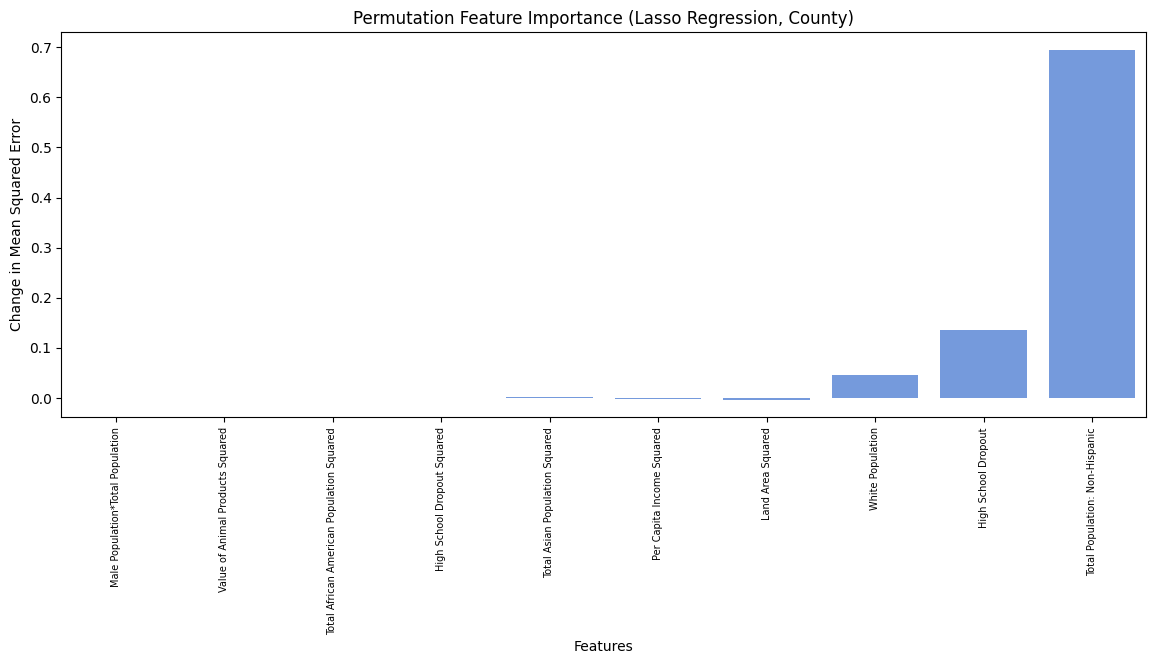

In [188]:
color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         ) 
plt.figure(figsize=[14,5])
#plt.axhline(0, c='black')
#[plt.axvline(i + 0.5, linestyle='--', c='black') for i in range(0, len(county_poly_2.get_feature_names_out(county_x.columns)))]
sns.barplot(x=graph_data_county_clean['features'], y=graph_data_county_clean['importances_mean'], color = "cornflowerblue")
plt.title("Permutation Feature Importance (Lasso Regression, County)")
plt.xlabel("Features")
plt.xticks(size = 7, rotation=90)
plt.ylabel("Change in Mean Squared Error")

#### References 

* Stack exchange on how to create dataframe with model predictions: https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe
* Stack exchange on how to retrieve dataframe indicies: https://stackoverflow.com/questions/16122955/how-to-retrieve-all-indexes-from-pandas-dataframe